In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("E:/Attrition/datasets/train.csv")
df_test = pd.read_csv("E:/Attrition/datasets/test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id                        1176 non-null   object
 1   Age                       1176 non-null   int64 
 2   BusinessTravel            1176 non-null   object
 3   DailyRate                 1176 non-null   int64 
 4   Department                1176 non-null   object
 5   DistanceFromHome          1176 non-null   int64 
 6   Education                 1176 non-null   int64 
 7   EducationField            1176 non-null   object
 8   EmployeeCount             1176 non-null   int64 
 9   EmployeeNumber            1176 non-null   int64 
 10  EnvironmentSatisfaction   1176 non-null   int64 
 11  Gender                    1176 non-null   object
 12  HourlyRate                1176 non-null   int64 
 13  JobInvolvement            1176 non-null   int64 
 14  JobLevel                

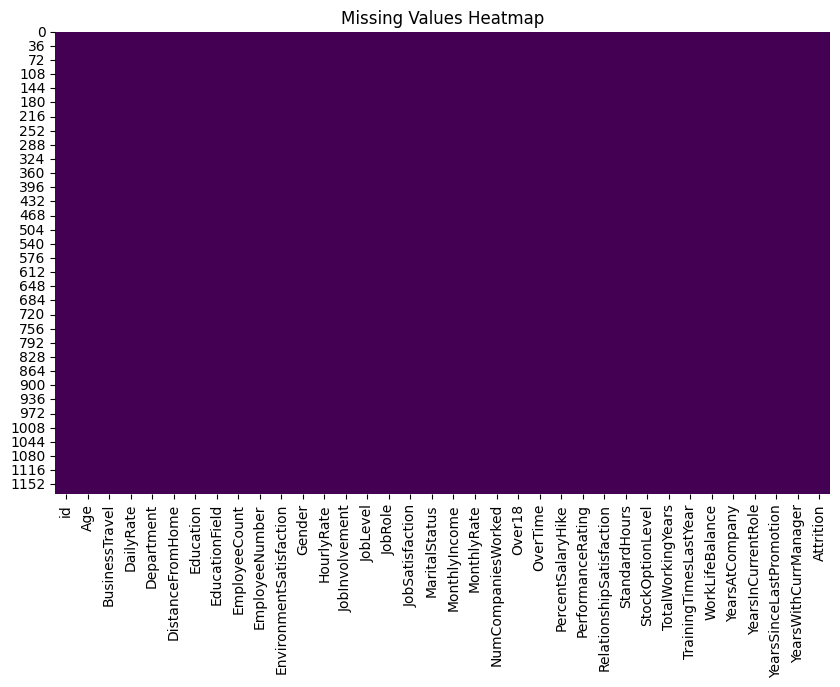

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [27]:
# Checking Outliers untuk kolom numerik
def detect_outliers(column):
    if column.dtype in ['float64', 'int64']:  # tipe data numerik
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = column[(column < lower_bound) | (column > upper_bound)]
        return len(outliers)
    return 0

outlier_counts = df.apply(detect_outliers)
print("Jumlah Outlier:\n", outlier_counts)

Jumlah Outlier:
 id                            0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked           36
OverTime                      0
PercentSalaryHike             0
PerformanceRating           185
RelationshipSatisfaction      0
StockOptionLevel             66
TotalWorkingYears             9
TrainingTimesLastYear       174
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole           16
YearsSinceLastPromotion

In [28]:

outdf = outlier_counts.reset_index()
outdf.columns = ['Fitur', 'Outlier']
outdf_table = outdf.to_markdown(index=False)
print(outdf_table)

| Fitur                    |   Outlier |
|:-------------------------|----------:|
| id                       |         0 |
| Age                      |         0 |
| BusinessTravel           |         0 |
| DailyRate                |         0 |
| Department               |         0 |
| DistanceFromHome         |         0 |
| Education                |         0 |
| EducationField           |         0 |
| EmployeeNumber           |         0 |
| EnvironmentSatisfaction  |         0 |
| Gender                   |         0 |
| HourlyRate               |         0 |
| JobInvolvement           |         0 |
| JobLevel                 |         0 |
| JobRole                  |         0 |
| JobSatisfaction          |         0 |
| MaritalStatus            |         0 |
| MonthlyIncome            |         0 |
| MonthlyRate              |         0 |
| NumCompaniesWorked       |        36 |
| OverTime                 |         0 |
| PercentSalaryHike        |         0 |
| PerformanceRat

In [24]:
df.isnull().sum()

id                          0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
Attrition                   0
dtype: int

In [26]:
misscols = df.isnull().sum()
misscols_df = misscols.reset_index()
misscols_df.columns = ['Fitur', 'Missing']
markdown_table = misscols_df.to_markdown(index=False)
print(markdown_table)

| Fitur                    |   Missing |
|:-------------------------|----------:|
| id                       |         0 |
| Age                      |         0 |
| BusinessTravel           |         0 |
| DailyRate                |         0 |
| Department               |         0 |
| DistanceFromHome         |         0 |
| Education                |         0 |
| EducationField           |         0 |
| EmployeeNumber           |         0 |
| EnvironmentSatisfaction  |         0 |
| Gender                   |         0 |
| HourlyRate               |         0 |
| JobInvolvement           |         0 |
| JobLevel                 |         0 |
| JobRole                  |         0 |
| JobSatisfaction          |         0 |
| MaritalStatus            |         0 |
| MonthlyIncome            |         0 |
| MonthlyRate              |         0 |
| NumCompaniesWorked       |         0 |
| OverTime                 |         0 |
| PercentSalaryHike        |         0 |
| PerformanceRat

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
# Display the number of unique values for each column
print("Number of unique values per column:")
display(df.nunique())

Number of unique values per column:


id                          1173
Age                           43
BusinessTravel                 3
DailyRate                    787
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1176
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1098
MonthlyRate                 1153
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [7]:
# Display the number of unique values for each column
print("Number of unique values per column:")
display(df_test.nunique())

Number of unique values per column:


id                          294
Age                          40
BusinessTravel                3
DailyRate                   263
Department                    3
DistanceFromHome             29
Education                     5
EducationField                6
EmployeeCount                 1
EmployeeNumber              294
EnvironmentSatisfaction       4
Gender                        2
HourlyRate                   71
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome               290
MonthlyRate                 291
NumCompaniesWorked           10
Over18                        1
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
RelationshipSatisfaction      4
StandardHours                 1
StockOptionLevel              4
TotalWorkingYears            34
TrainingTimesLastYear         7
WorkLifeBalance               4
YearsAtC

In [8]:
# Drop specified columns
df = df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
df_test = df_test.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1)
print("DataFrames after dropping specified columns:")
print("\nTraining DataFrame (df):")
display(df.head())
print("\nTest DataFrame (df_test):")
display(df_test.head())

DataFrames after dropping specified columns:

Training DataFrame (df):


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1676,2,...,3,3,29,2,3,3,2,1,2,0
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,169,3,...,3,1,3,2,3,2,1,2,1,0
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1124,1,...,4,1,23,3,3,12,9,4,9,0
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,645,2,...,3,0,7,1,3,7,4,0,6,0
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,663,4,...,2,1,10,3,3,8,7,4,7,0



Test DataFrame (df_test):


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,24,Non-Travel,830,Sales,13,2,Life Sciences,1495,4,...,3,3,1,1,2,3,1,0,0,0
1,PJ010,44,Travel_Rarely,1117,Research & Development,2,1,Life Sciences,1246,1,...,3,4,1,10,5,3,10,5,7,7
2,GJ831,31,Travel_Rarely,688,Sales,7,3,Life Sciences,613,3,...,4,3,1,10,3,2,5,4,0,1
3,JD352,44,Travel_Rarely,1199,Research & Development,4,2,Life Sciences,1288,3,...,3,4,2,26,4,2,25,9,14,13
4,WZ263,36,Travel_Rarely,318,Research & Development,9,3,Medical,90,4,...,3,1,1,2,0,2,1,0,0,0


In [9]:
# Manually select numerical and ordinal columns
numerical_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'EmployeeNumber', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
ordinal_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']

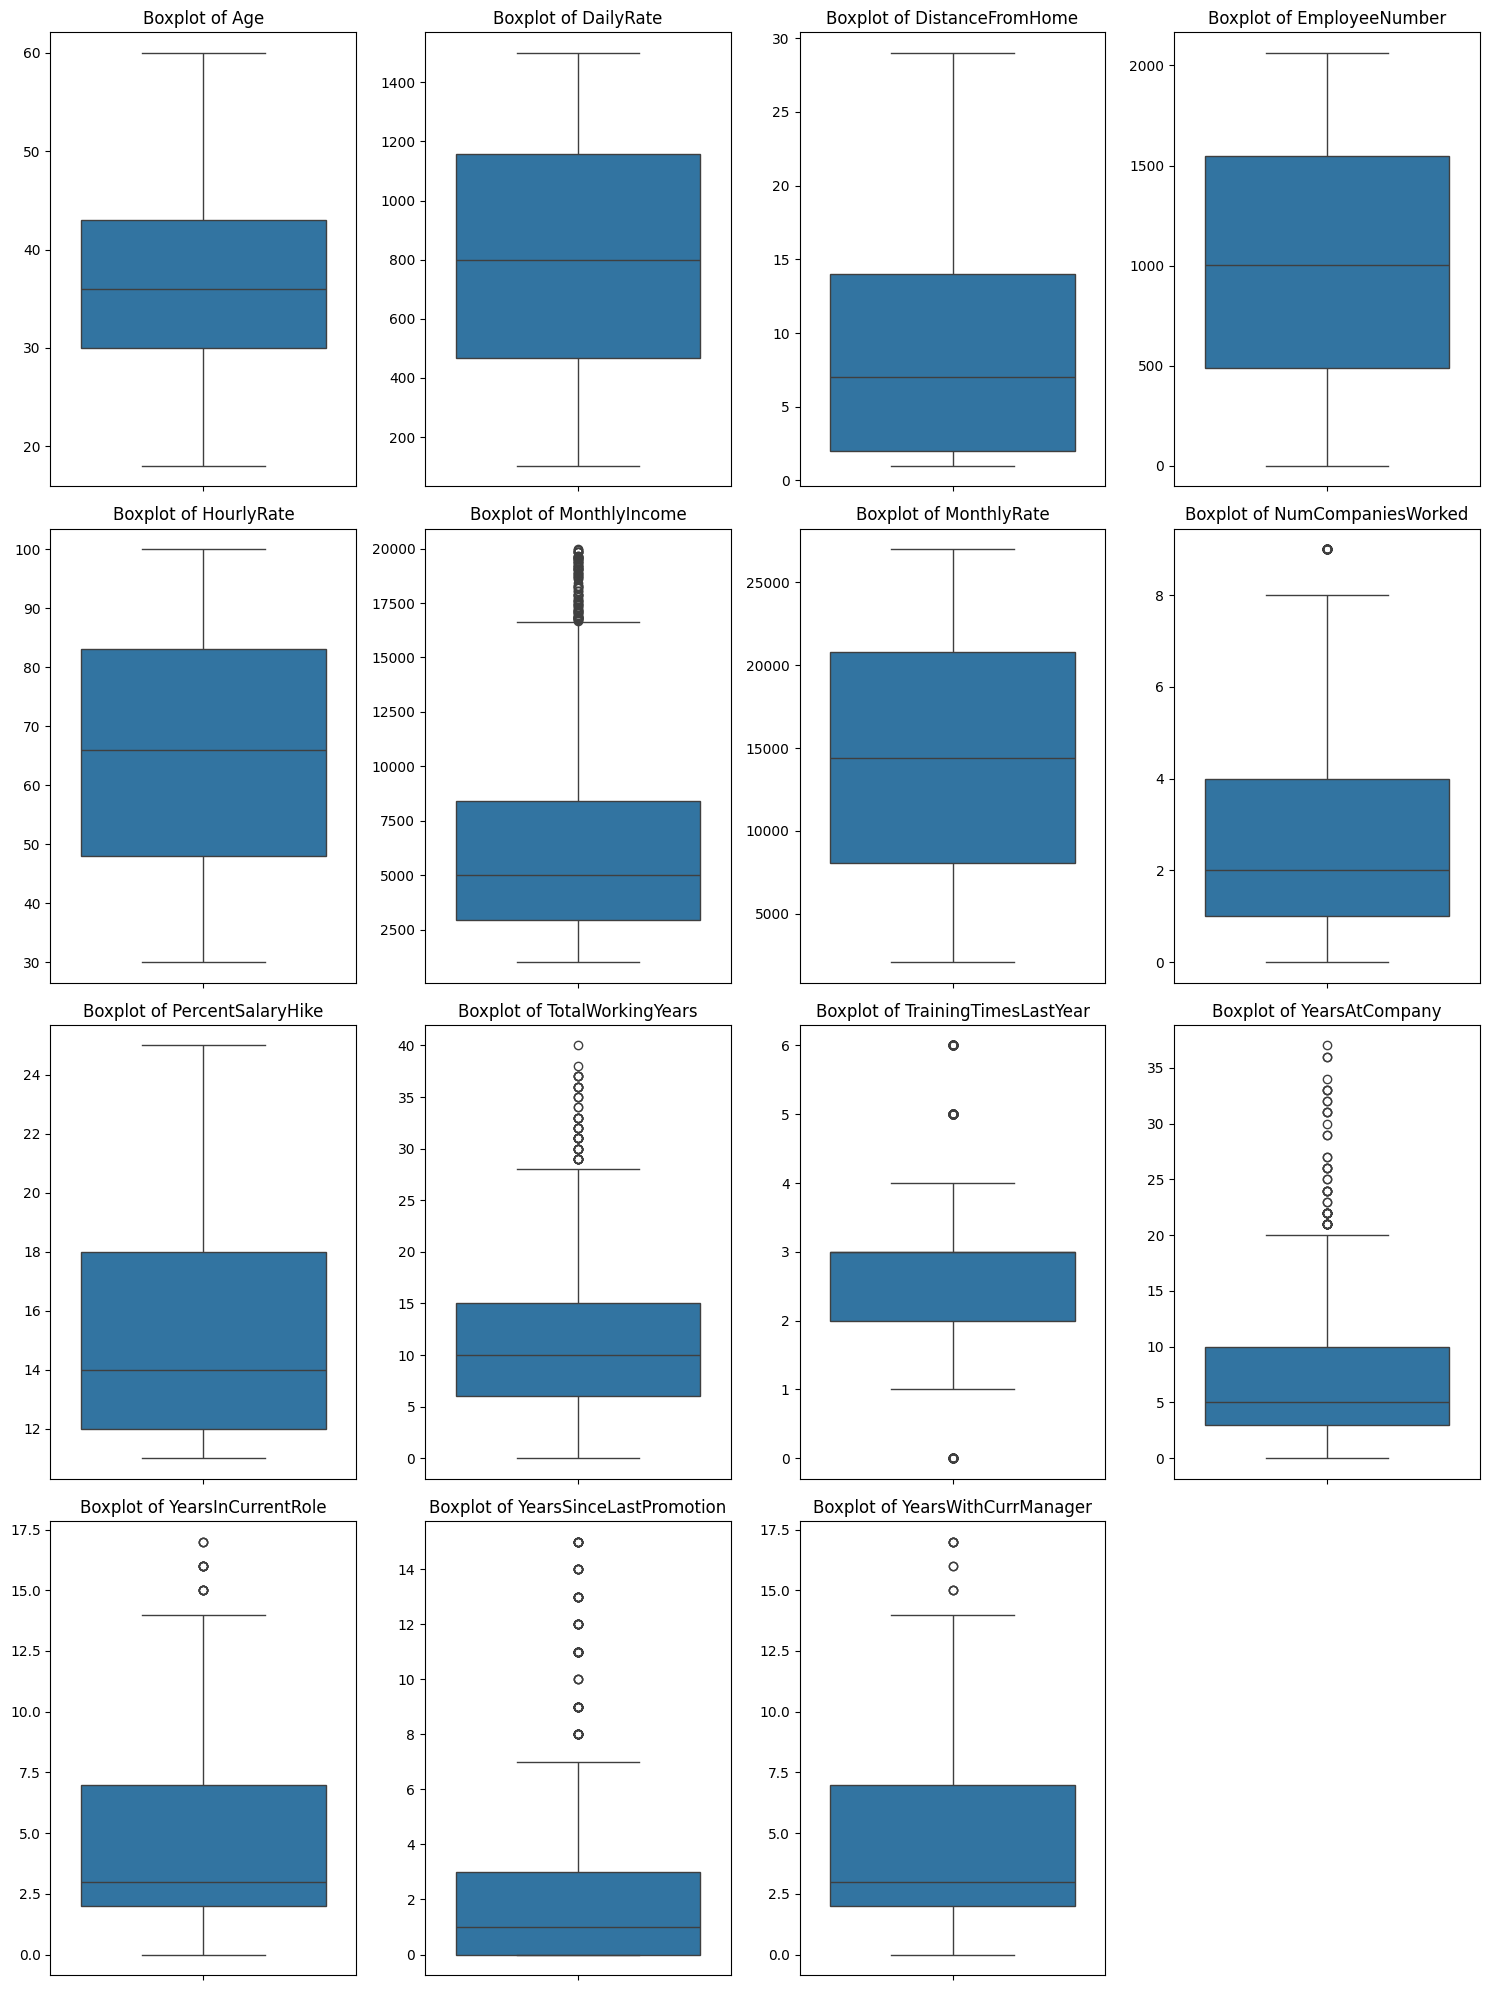

In [10]:
import math

# Determine the number of rows and columns for the grid
n_cols = 4  # You can adjust the number of columns
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create a figure and subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5)) # Adjust figure size as needed

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Create vertical boxplots for each numerical column in numerical_cols
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel('') # Remove y-label for clarity

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

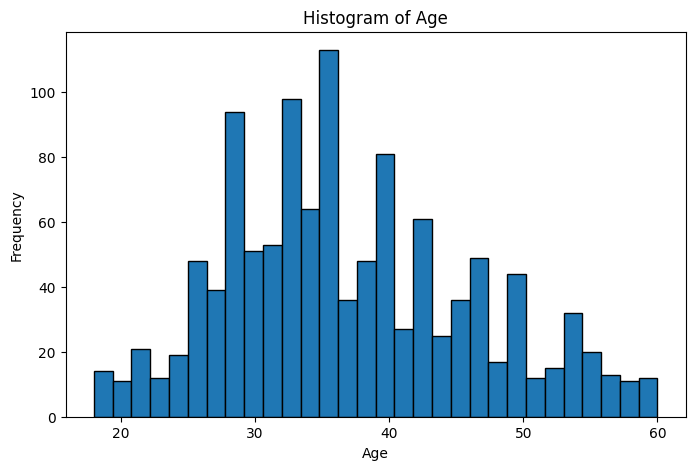

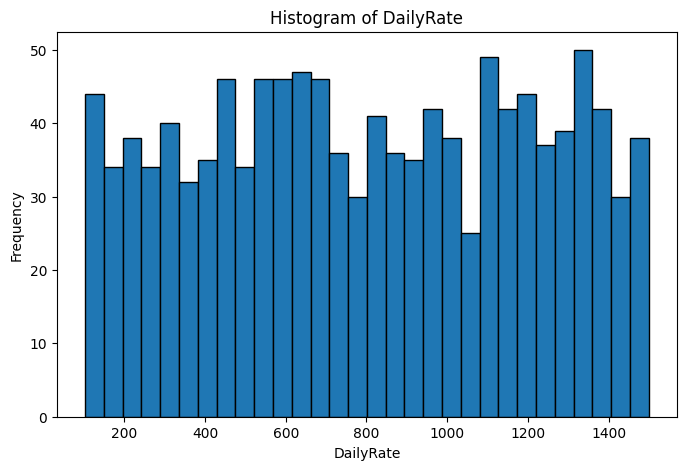

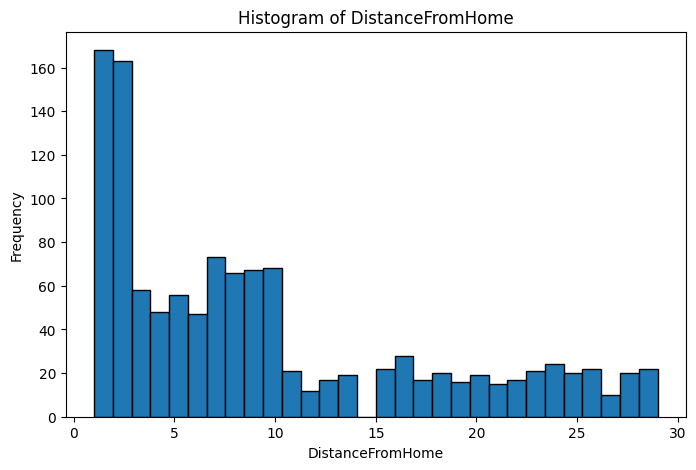

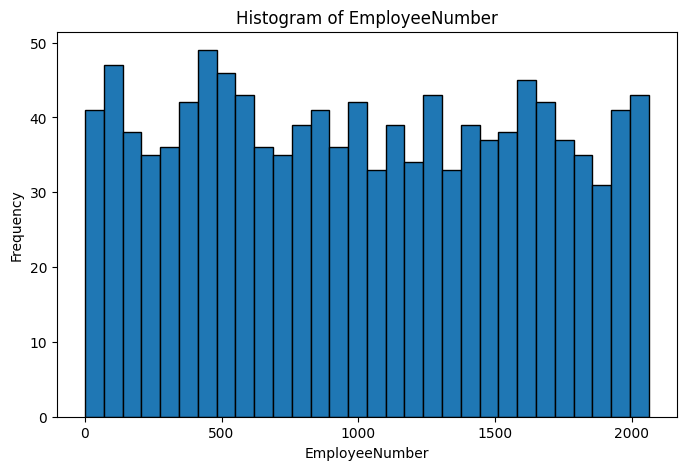

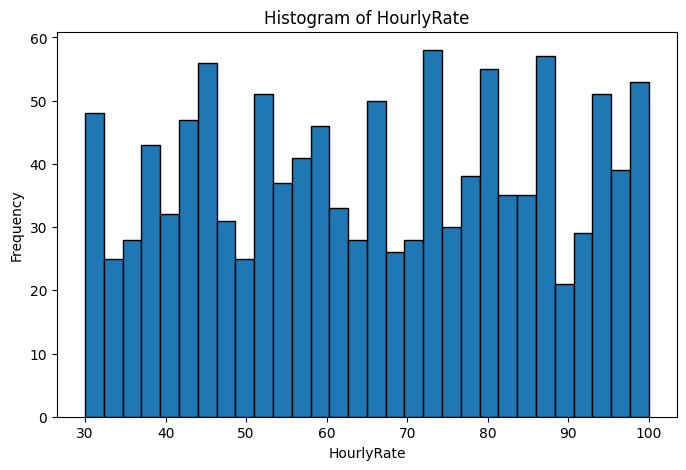

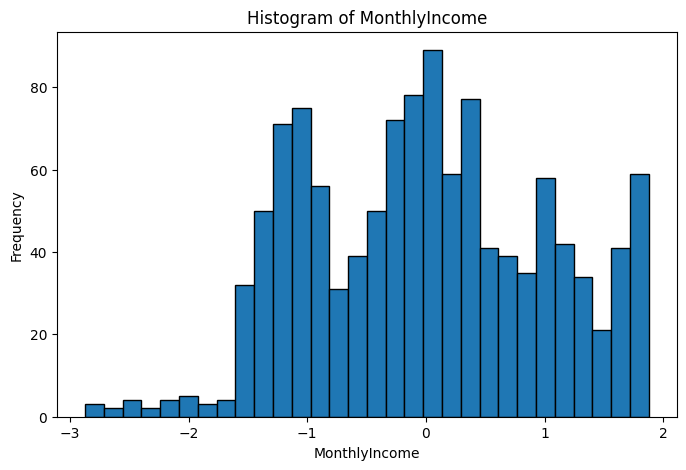

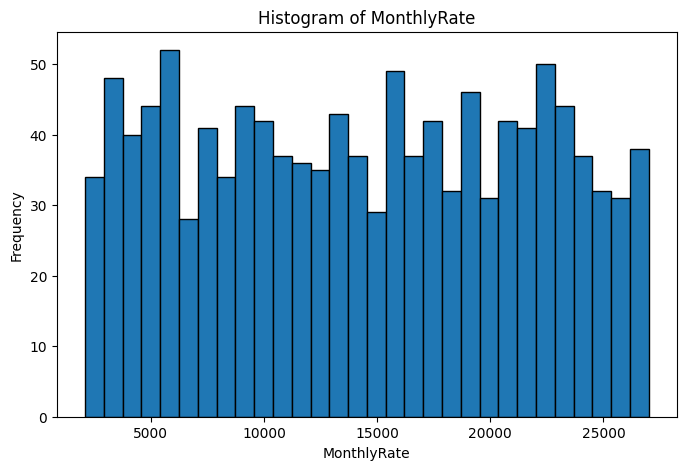

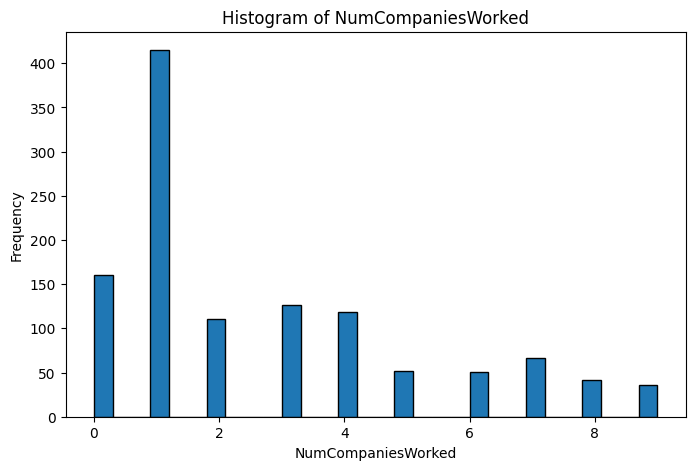

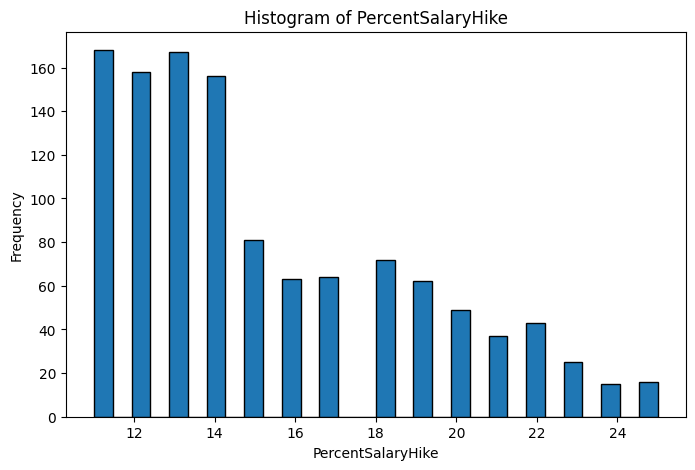

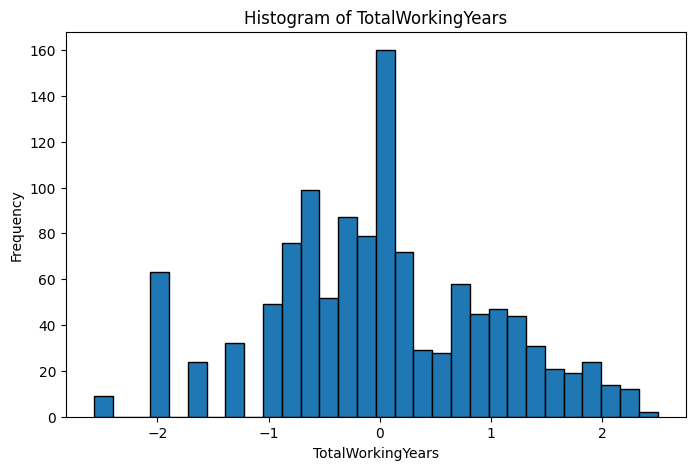

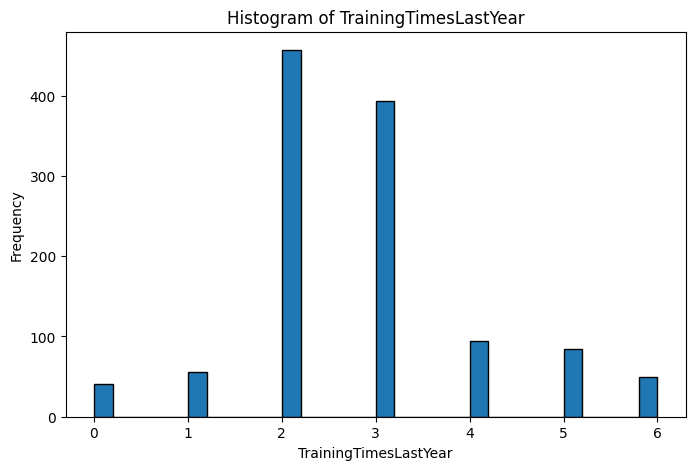

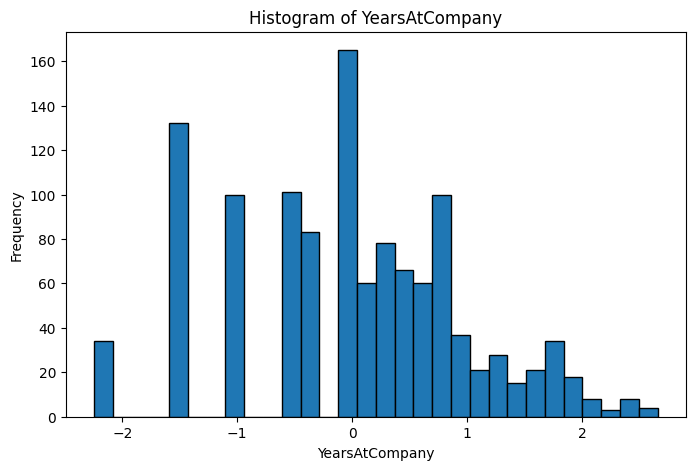

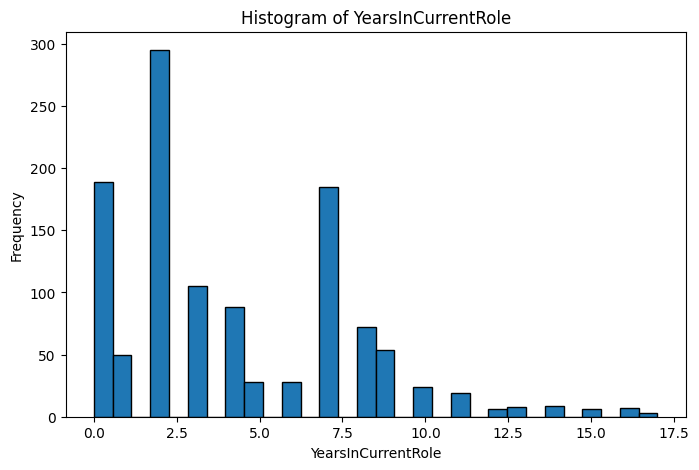

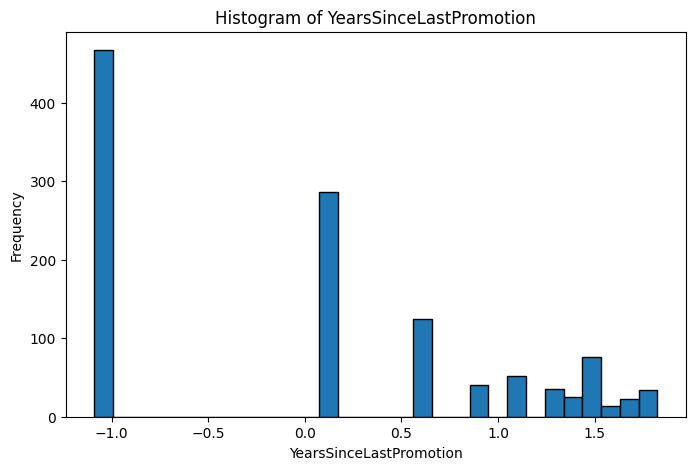

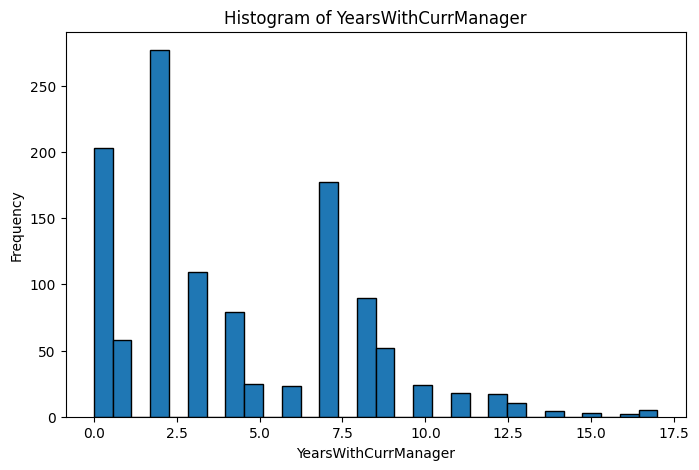

In [ ]:
import matplotlib.pyplot as plt

# Create histograms for each numerical column
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [12]:
# Calculate the skewness of numerical columns
skewed_cols = df[numerical_cols].skew()

print("Skewness of numerical columns:")
display(skewed_cols)

Skewness of numerical columns:


Age                        0.403687
DailyRate                 -0.004044
DistanceFromHome           0.928220
EmployeeNumber             0.038854
HourlyRate                -0.010078
MonthlyIncome              1.332950
MonthlyRate                0.002714
NumCompaniesWorked         0.999071
PercentSalaryHike          0.806662
TotalWorkingYears          1.103707
TrainingTimesLastYear      0.614129
YearsAtCompany             1.732897
YearsInCurrentRole         0.872928
YearsSinceLastPromotion    1.970864
YearsWithCurrManager       0.778037
dtype: float64

In [13]:
from sklearn.preprocessing import PowerTransformer

# Define the columns to apply Yeo-Johnson transformation
yeo_johnson_cols = ['MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsSinceLastPromotion']

# Apply Yeo-Johnson transformation to the specified columns
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')

df[yeo_johnson_cols] = yeo_johnson_transformer.fit_transform(df[yeo_johnson_cols])

print("DataFrames after applying Yeo-Johnson transformation to specified columns:")
print("\nTraining DataFrame (df):")
display(df.head())

DataFrames after applying Yeo-Johnson transformation to specified columns:

Training DataFrame (df):


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1676,2,...,3,3,1.823906,2,3,-0.611588,2,0.101344,2,0
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,169,3,...,3,1,-1.291790,2,3,-0.972313,1,0.611267,1,0
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1124,1,...,4,1,1.379415,3,3,0.995379,9,1.108182,9,0
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,645,2,...,3,0,-0.423963,1,3,0.307374,4,-1.091513,6,0
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,663,4,...,2,1,0.039260,3,3,0.470824,7,1.108182,7,0


In [14]:
print("Skewness of numerical columns:")
display(df[numerical_cols].skew())

Skewness of numerical columns:


Age                        0.403687
DailyRate                 -0.004044
DistanceFromHome           0.928220
EmployeeNumber             0.038854
HourlyRate                -0.010078
MonthlyIncome              0.029391
MonthlyRate                0.002714
NumCompaniesWorked         0.999071
PercentSalaryHike          0.806662
TotalWorkingYears         -0.010403
TrainingTimesLastYear      0.614129
YearsAtCompany            -0.008537
YearsInCurrentRole         0.872928
YearsSinceLastPromotion    0.214962
YearsWithCurrManager       0.778037
dtype: float64

In [15]:
# Separate features (X_train) and target variable (y_train)
x_train = df.drop('Attrition', axis=1)
y_train = df['Attrition']

print("X_train (features):")
display(x_train)

print("\ny_train (target):")
display(y_train)

X_train (features):


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,VM684,47,Travel_Rarely,1225,Sales,2,4,Life Sciences,1676,2,...,3,3,3,1.823906,2,3,-0.611588,2,0.101344,2
1,ZO618,22,Travel_Rarely,594,Research & Development,2,1,Technical Degree,169,3,...,3,3,1,-1.291790,2,3,-0.972313,1,0.611267,1
2,JO233,46,Travel_Rarely,406,Sales,3,1,Marketing,1124,1,...,3,4,1,1.379415,3,3,0.995379,9,1.108182,9
3,GW565,25,Travel_Rarely,622,Sales,13,1,Medical,645,2,...,3,3,0,-0.423963,1,3,0.307374,4,-1.091513,6
4,OZ187,43,Travel_Frequently,1001,Research & Development,9,5,Medical,663,4,...,3,2,1,0.039260,3,3,0.470824,7,1.108182,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,TB175,23,Travel_Rarely,427,Sales,7,3,Life Sciences,1702,3,...,4,2,1,-1.291790,2,3,-0.611588,2,-1.091513,2
1172,UC176,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1355,2,...,3,4,1,0.173698,3,3,0.307374,7,0.101344,7
1173,ER115,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1019,2,...,3,1,1,-1.031807,3,2,-0.323583,3,0.101344,1
1174,TG383,36,Travel_Rarely,430,Research & Development,2,4,Other,1847,4,...,4,4,1,0.643954,2,3,-1.461183,0,-1.091513,0



y_train (target):


0       0
1       0
2       0
3       0
4       0
       ..
1171    1
1172    0
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int64

In [16]:
!pip install category_encoders

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
import category_encoders as ce

nominal_cols = x_train.select_dtypes(include='object').columns.tolist()
if 'id' in nominal_cols:
    nominal_cols.remove('id')

# Gunakan OrdinalEncoder yang handle unknown categories
encoder = ce.OrdinalEncoder(
    cols=nominal_cols,
    handle_unknown='value',  # Assign -1 untuk kategori baru
    handle_missing='value'   # Assign -2 untuk missing values
)

# TRAIN: Fit dan transform
x_train_encoded = encoder.fit_transform(x_train)

# TEST: Transform saja
x_test_encoded = encoder.transform(df_test)

print("DataFrames after Ordinal Encoding:")
print("\nTraining DataFrame:")
display(x_train_encoded)
print("\nTest DataFrame:")
display(x_test_encoded)

DataFrames after Ordinal Encoding:

Training DataFrame:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,VM684,47,1,1225,1,2,4,1,1676,2,...,3,3,3,1.823906,2,3,-0.611588,2,0.101344,2
1,ZO618,22,1,594,2,2,1,2,169,3,...,3,3,1,-1.291790,2,3,-0.972313,1,0.611267,1
2,JO233,46,1,406,1,3,1,3,1124,1,...,3,4,1,1.379415,3,3,0.995379,9,1.108182,9
3,GW565,25,1,622,1,13,1,4,645,2,...,3,3,0,-0.423963,1,3,0.307374,4,-1.091513,6
4,OZ187,43,2,1001,2,9,5,4,663,4,...,3,2,1,0.039260,3,3,0.470824,7,1.108182,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,TB175,23,1,427,1,7,3,1,1702,3,...,4,2,1,-1.291790,2,3,-0.611588,2,-1.091513,2
1172,UC176,38,1,1009,1,2,2,1,1355,2,...,3,4,1,0.173698,3,3,0.307374,7,0.101344,7
1173,ER115,22,1,217,2,8,1,1,1019,2,...,3,1,1,-1.031807,3,2,-0.323583,3,0.101344,1
1174,TG383,36,1,430,2,2,4,5,1847,4,...,4,4,1,0.643954,2,3,-1.461183,0,-1.091513,0



Test DataFrame:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,24,3,830,1,13,2,1,1495,4,...,3,3,1,1,2,3,1,0,0,0
1,PJ010,44,1,1117,2,2,1,1,1246,1,...,3,4,1,10,5,3,10,5,7,7
2,GJ831,31,1,688,1,7,3,1,613,3,...,4,3,1,10,3,2,5,4,0,1
3,JD352,44,1,1199,2,4,2,1,1288,3,...,3,4,2,26,4,2,25,9,14,13
4,WZ263,36,1,318,2,9,3,4,90,4,...,3,1,1,2,0,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ED286,43,1,244,3,2,3,1,1778,2,...,3,2,0,10,5,3,9,7,1,8
290,LQ713,44,1,170,2,1,4,1,1903,2,...,3,4,1,10,5,3,2,0,2,2
291,RZ361,36,1,1456,1,13,5,3,1733,2,...,3,2,3,16,3,3,2,2,2,2
292,IF234,56,1,1255,2,1,2,1,1441,1,...,4,4,1,5,3,4,3,2,1,0


In [18]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi scaler
robust_scaler = RobustScaler()

# Tentukan kolom yang akan di-scale
cols_to_scale = [col for col in x_train_encoded.columns if col not in ['id']]

# Pastikan kolom yang sama ada di df_test
missing_cols = set(cols_to_scale) - set(x_test_encoded.columns)
if missing_cols:
    print(f"Warning: Kolom {missing_cols} tidak ada di df_test")
    cols_to_scale = [col for col in cols_to_scale if col in x_test_encoded.columns]

# TRAIN: Fit dan transform
x_train_encoded[cols_to_scale] = robust_scaler.fit_transform(x_train_encoded[cols_to_scale])

# TEST: Transform saja
x_test_encoded[cols_to_scale] = robust_scaler.transform(x_test_encoded[cols_to_scale])

print("DataFrames after scale:")
print("\nTraining DataFrame:")
display(x_train_encoded)
print("\nTest DataFrame:")
display(x_test_encoded)

DataFrames after scale:

Training DataFrame:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,VM684,0.846154,0.0,0.617338,-1.0,-0.416667,0.5,-0.333333,0.633790,-0.5,...,0.0,0.0,2.0,1.428413,-1.0,0.0,-0.387116,-0.2,0.000000,-0.2
1,ZO618,-1.076923,0.0,-0.298150,0.0,-0.416667,-1.0,0.000000,-0.788580,0.0,...,0.0,0.0,0.0,-1.065358,-1.0,0.0,-0.651199,-0.4,0.254951,-0.4
2,JO233,0.769231,0.0,-0.570910,-1.0,-0.333333,-1.0,0.333333,0.112789,-1.0,...,0.0,0.5,0.0,1.072647,0.0,0.0,0.789324,1.2,0.503398,1.2
3,GW565,-0.846154,0.0,-0.257526,-1.0,0.500000,-1.0,0.666667,-0.339311,-0.5,...,0.0,0.0,-1.0,-0.370759,-2.0,0.0,0.285644,0.2,-0.596404,0.6
4,OZ187,0.538462,1.0,0.292347,0.0,0.166667,1.0,0.666667,-0.322322,0.5,...,0.0,-0.5,0.0,0.000000,0.0,0.0,0.405304,0.8,0.503398,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,TB175,-1.000000,0.0,-0.540443,-1.0,0.000000,0.0,-0.333333,0.658329,0.0,...,1.0,-0.5,0.0,-1.065358,-1.0,0.0,-0.387116,-0.2,-0.596404,-0.2
1172,UC176,0.153846,0.0,0.303954,-1.0,-0.416667,-0.5,-0.333333,0.330816,-0.5,...,0.0,0.5,0.0,0.107603,0.0,0.0,0.285644,0.8,0.000000,0.8
1173,ER115,-1.076923,0.0,-0.845122,0.0,0.083333,-1.0,-0.333333,0.013686,-0.5,...,0.0,-1.0,0.0,-0.857271,0.0,-1.0,-0.176272,0.0,0.000000,-0.4
1174,TG383,0.000000,0.0,-0.536090,0.0,-0.416667,0.5,1.000000,0.795186,0.5,...,1.0,0.5,0.0,0.483991,-1.0,0.0,-1.009094,-0.6,-0.596404,-0.6



Test DataFrame:


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,CM617,-0.923077,2.0,0.044251,-1.0,0.500000,-0.5,-0.333333,0.462954,0.5,...,0.0,0.0,0.0,0.768967,-1.0,0.0,0.792706,-0.6,-0.050670,-0.6
1,PJ010,0.615385,0.0,0.460646,0.0,-0.416667,-1.0,-0.333333,0.227938,-1.0,...,0.0,0.5,0.0,7.972474,2.0,0.0,7.381489,0.4,3.449185,0.8
2,GJ831,-0.384615,0.0,-0.161770,-1.0,0.000000,0.0,-0.333333,-0.369514,0.0,...,1.0,0.0,0.0,7.972474,0.0,-1.0,3.721054,0.2,-0.050670,-0.4
3,JD352,0.615385,0.0,0.579616,0.0,-0.250000,-0.5,-0.333333,0.267579,0.0,...,0.0,0.5,1.0,20.778711,1.0,-1.0,18.362794,1.2,6.949041,2.0
4,WZ263,0.000000,0.0,-0.698585,0.0,0.166667,0.0,0.666667,-0.863143,0.5,...,0.0,-1.0,0.0,1.569356,-3.0,-1.0,0.792706,-0.6,-0.050670,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ED286,0.538462,0.0,-0.805948,1.0,-0.416667,0.0,-0.333333,0.730061,-0.5,...,0.0,-0.5,-1.0,7.972474,2.0,0.0,6.649402,0.8,0.449309,1.0
290,LQ713,0.615385,0.0,-0.913312,0.0,-0.500000,0.5,-0.333333,0.848042,-0.5,...,0.0,0.5,0.0,7.972474,2.0,0.0,1.524793,-0.6,0.949289,-0.2
291,RZ361,0.000000,0.0,0.952485,-1.0,0.500000,1.0,0.333333,0.687588,-0.5,...,0.0,-0.5,2.0,12.774813,0.0,0.0,1.524793,-0.2,0.949289,-0.2
292,IF234,1.538462,0.0,0.660863,0.0,-0.500000,-0.5,-0.333333,0.411987,-1.0,...,1.0,0.5,0.0,3.970526,0.0,1.0,2.256880,-0.2,0.449309,-0.6


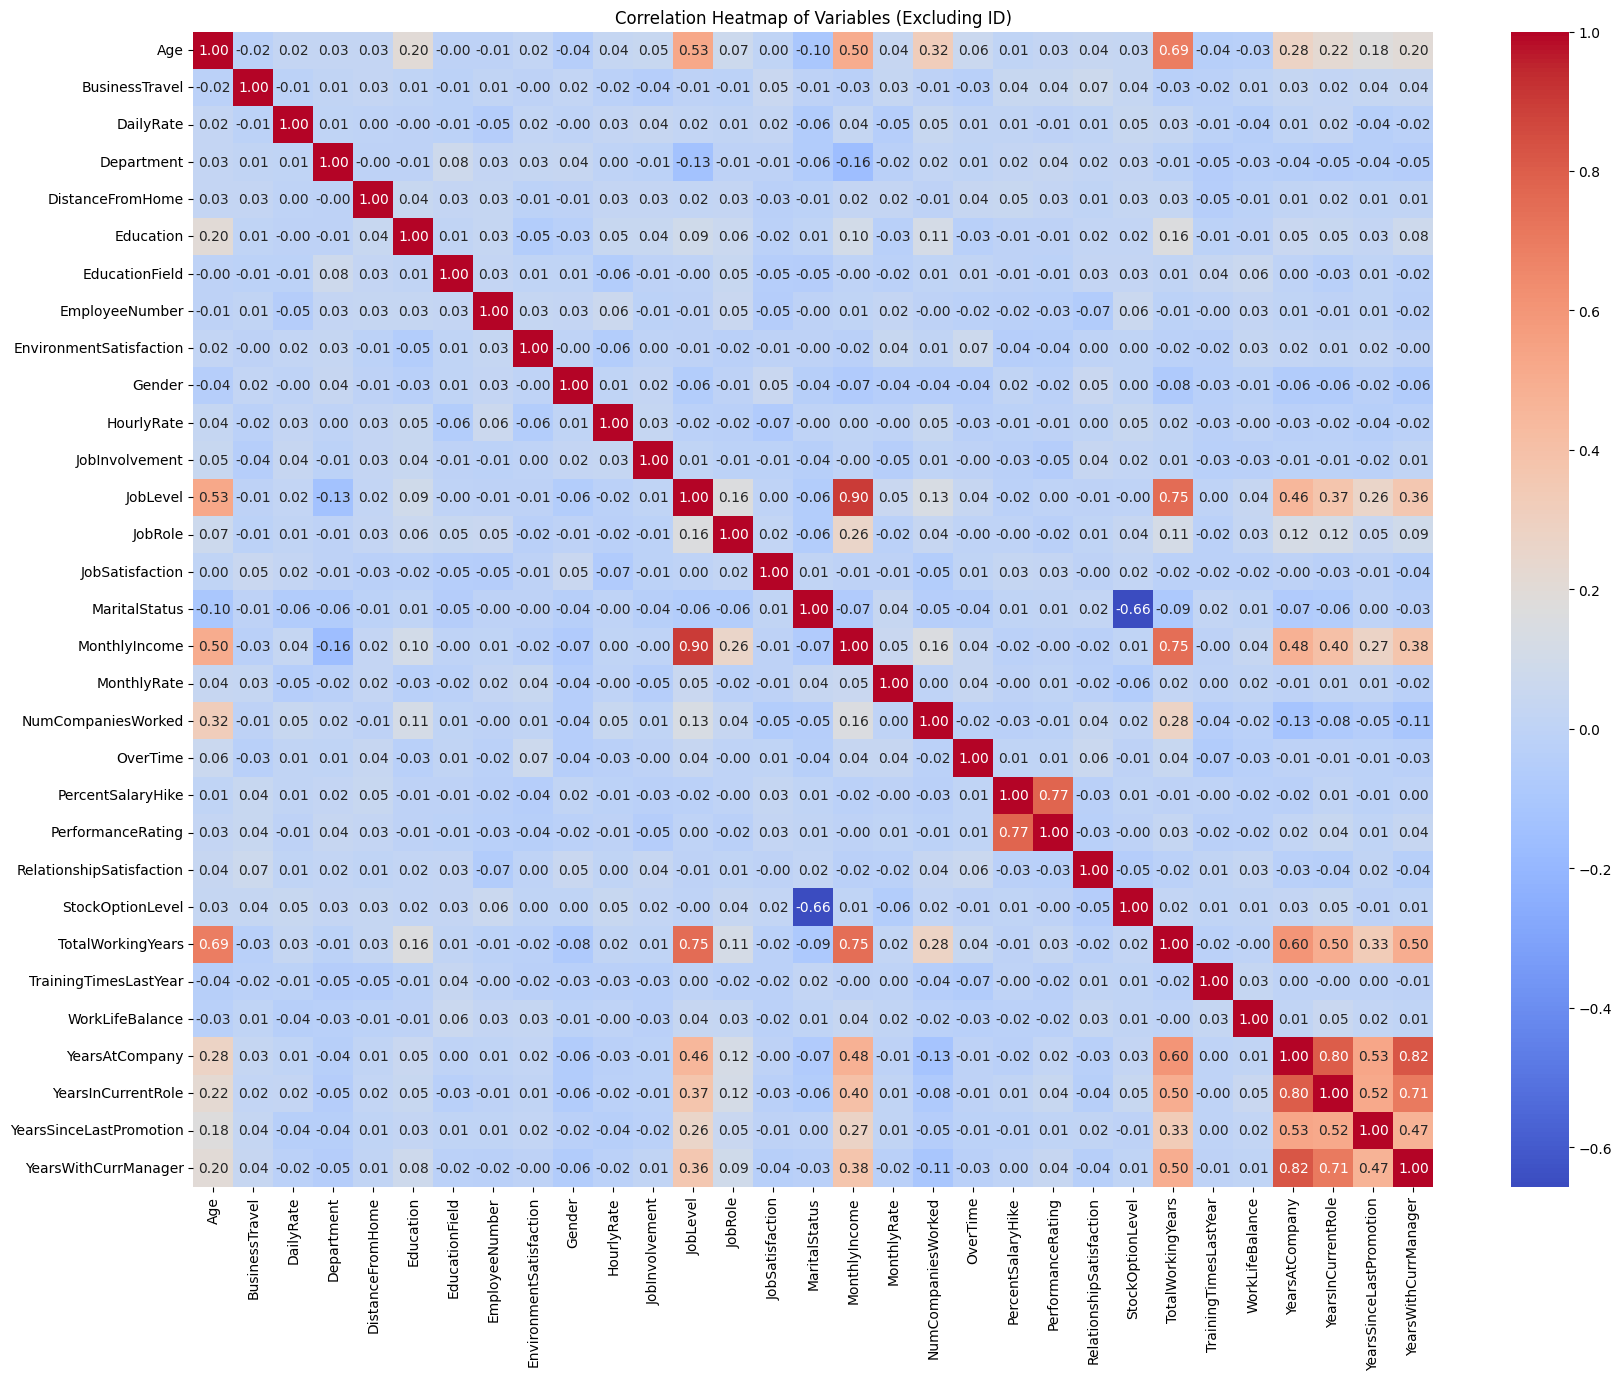

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude the 'id' column and calculate the correlation matrix
x_train_correlation = x_train_encoded.drop('id', axis=1).corr()

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(x_train_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables (Excluding ID)')
plt.show()

In [20]:
# Find pairs of variables with correlation greater than or equal to 0.8
high_correlation_pairs = x_train_correlation.unstack().sort_values(ascending=False)

# Remove self-correlations and duplicate pairs
high_correlation_pairs = high_correlation_pairs[(abs(high_correlation_pairs) >= 0.8) & (abs(high_correlation_pairs) <1)]

print("Pairs of variables with correlation >= 0.8:")
display(high_correlation_pairs)

Pairs of variables with correlation >= 0.8:


JobLevel              MonthlyIncome           0.900601
MonthlyIncome         JobLevel                0.900601
YearsWithCurrManager  YearsAtCompany          0.820678
YearsAtCompany        YearsWithCurrManager    0.820678
YearsInCurrentRole    YearsAtCompany          0.804359
YearsAtCompany        YearsInCurrentRole      0.804359
dtype: float64

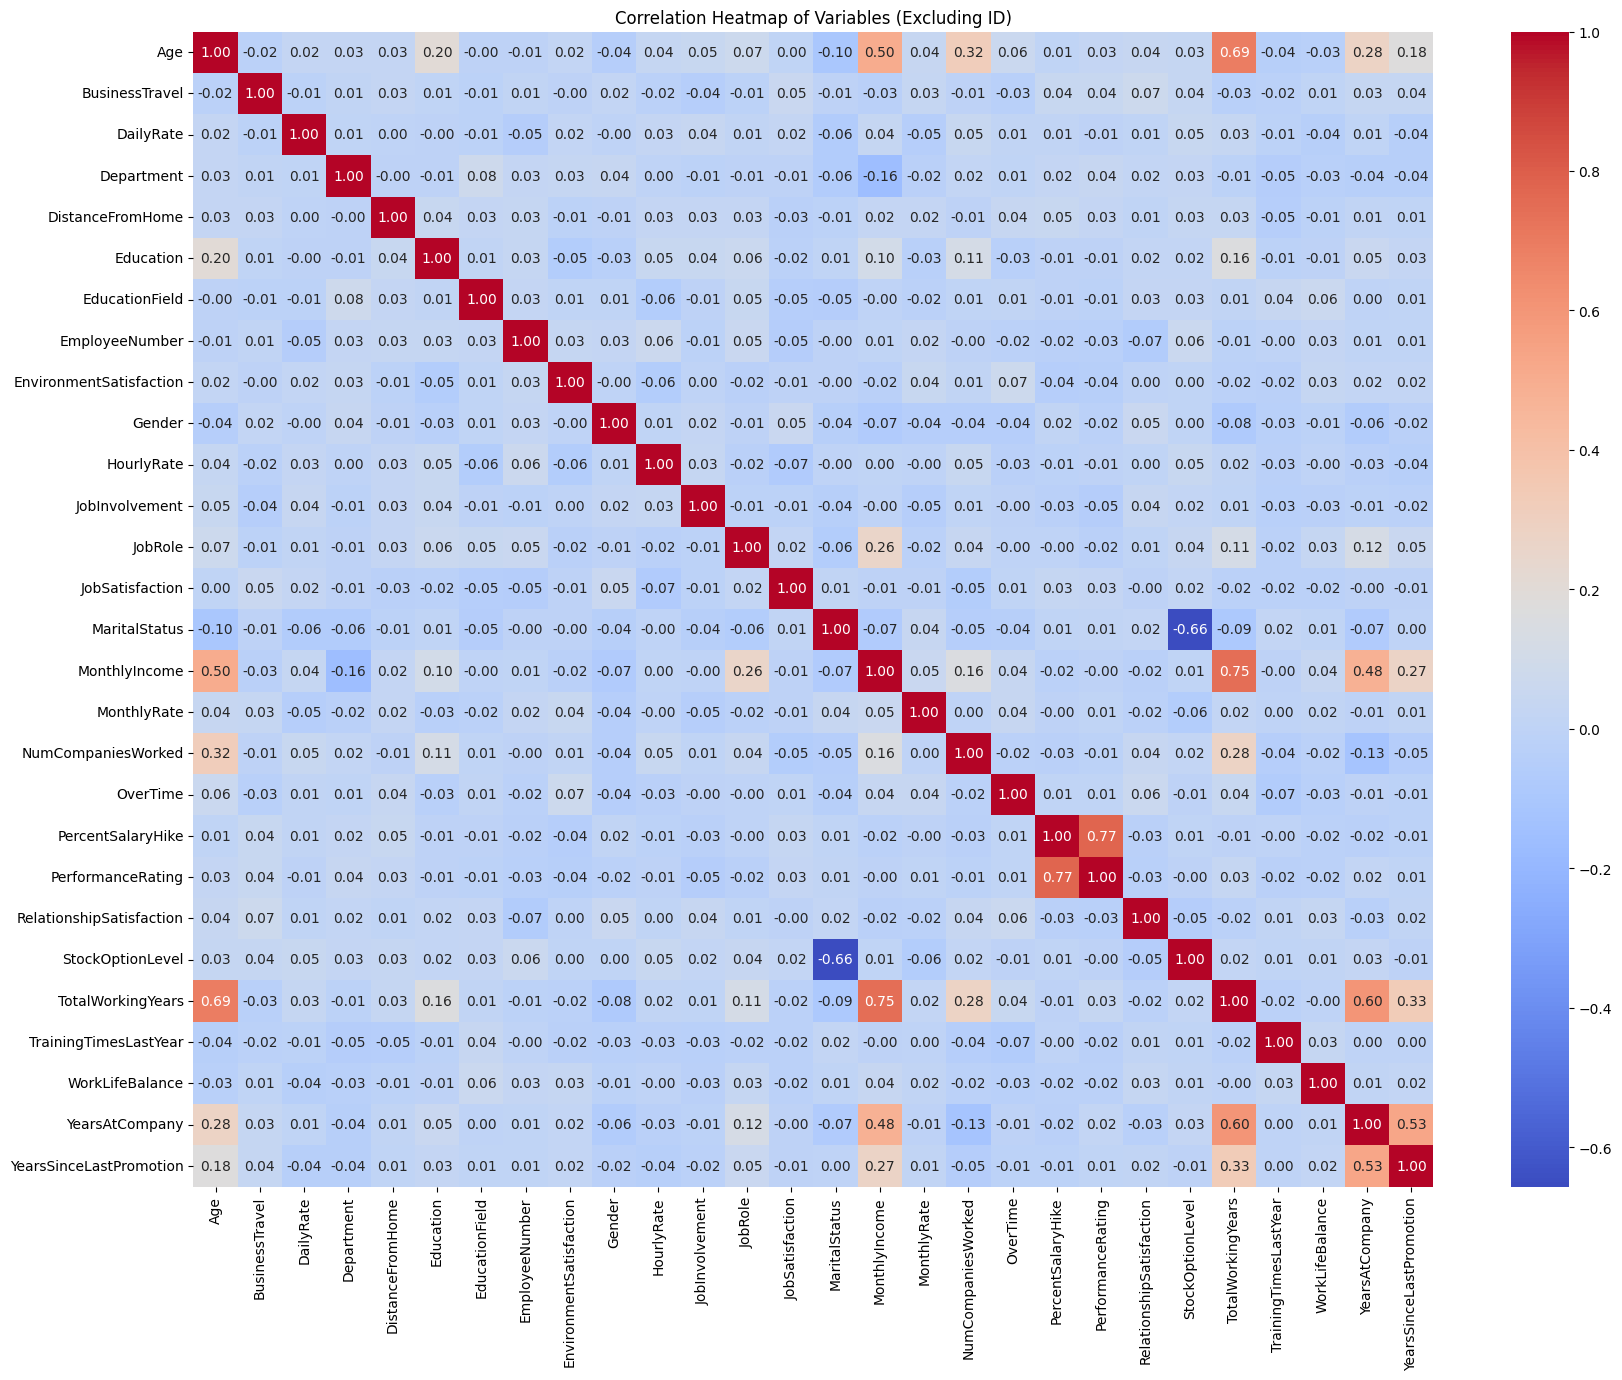

In [21]:
# Drop the specified columns from the DataFrame
cols_reduced = ['JobLevel', 'YearsInCurrentRole', 'YearsWithCurrManager']

# Exclude the 'id' column and calculate the correlation matrix for the reduced DataFrame
x_train_reduced = x_train_encoded.drop(columns=cols_reduced)
x_test_reduced = x_test_encoded.drop(columns=cols_reduced)

x_train_correlation_reduced = x_train_reduced.drop('id', axis=1).corr()

# Create the heatmap for the reduced DataFrame
plt.figure(figsize=(20, 15))
sns.heatmap(x_train_correlation_reduced, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables (Excluding ID)')
plt.show()

In [22]:
print("Data x Train")
print(x_train_reduced.info())
print("\nData y Train")
print(y_train.info())
print("\nData Test")
print(x_test_reduced.info())

Data x Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1176 non-null   object 
 1   Age                       1176 non-null   float64
 2   BusinessTravel            1176 non-null   float64
 3   DailyRate                 1176 non-null   float64
 4   Department                1176 non-null   float64
 5   DistanceFromHome          1176 non-null   float64
 6   Education                 1176 non-null   float64
 7   EducationField            1176 non-null   float64
 8   EmployeeNumber            1176 non-null   float64
 9   EnvironmentSatisfaction   1176 non-null   float64
 10  Gender                    1176 non-null   float64
 11  HourlyRate                1176 non-null   float64
 12  JobInvolvement            1176 non-null   float64
 13  JobRole                   1176 non-null   float64


In [23]:
print("Data x Train")
display(x_train_reduced)
print("\nData Train")
display(y_train)
print("\nData Test")
display(x_test_reduced)

Data x Train


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,VM684,0.846154,0.0,0.617338,-1.0,-0.416667,0.5,-0.333333,0.633790,-0.5,...,0.0,0.000000,0.0,0.0,2.0,1.428413,-1.0,0.0,-0.387116,0.000000
1,ZO618,-1.076923,0.0,-0.298150,0.0,-0.416667,-1.0,0.000000,-0.788580,0.0,...,0.0,0.000000,0.0,0.0,0.0,-1.065358,-1.0,0.0,-0.651199,0.254951
2,JO233,0.769231,0.0,-0.570910,-1.0,-0.333333,-1.0,0.333333,0.112789,-1.0,...,0.0,-0.333333,0.0,0.5,0.0,1.072647,0.0,0.0,0.789324,0.503398
3,GW565,-0.846154,0.0,-0.257526,-1.0,0.500000,-1.0,0.666667,-0.339311,-0.5,...,0.0,-0.500000,0.0,0.0,-1.0,-0.370759,-2.0,0.0,0.285644,-0.596404
4,OZ187,0.538462,1.0,0.292347,0.0,0.166667,1.0,0.666667,-0.322322,0.5,...,1.0,-0.166667,0.0,-0.5,0.0,0.000000,0.0,0.0,0.405304,0.503398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,TB175,-1.000000,0.0,-0.540443,-1.0,0.000000,0.0,-0.333333,0.658329,0.0,...,1.0,1.166667,1.0,-0.5,0.0,-1.065358,-1.0,0.0,-0.387116,-0.596404
1172,UC176,0.153846,0.0,0.303954,-1.0,-0.416667,-0.5,-0.333333,0.330816,-0.5,...,0.0,0.166667,0.0,0.5,0.0,0.107603,0.0,0.0,0.285644,0.000000
1173,ER115,-1.076923,0.0,-0.845122,0.0,0.083333,-1.0,-0.333333,0.013686,-0.5,...,0.0,0.166667,0.0,-1.0,0.0,-0.857271,0.0,-1.0,-0.176272,0.000000
1174,TG383,0.000000,0.0,-0.536090,0.0,-0.416667,0.5,1.000000,0.795186,0.5,...,1.0,1.333333,1.0,0.5,0.0,0.483991,-1.0,0.0,-1.009094,-0.596404



Data Train


0       0
1       0
2       0
3       0
4       0
       ..
1171    1
1172    0
1173    0
1174    0
1175    0
Name: Attrition, Length: 1176, dtype: int64


Data Test


,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion
0,CM617,-0.923077,2.0,0.044251,-1.0,0.500000,-0.5,-0.333333,0.462954,0.5,...,0.0,-0.166667,0.0,0.0,0.0,0.768967,-1.0,0.0,0.792706,-0.050670
1,PJ010,0.615385,0.0,0.460646,0.0,-0.416667,-1.0,-0.333333,0.227938,-1.0,...,0.0,-0.166667,0.0,0.5,0.0,7.972474,2.0,0.0,7.381489,3.449185
2,GJ831,-0.384615,0.0,-0.161770,-1.0,0.000000,0.0,-0.333333,-0.369514,0.0,...,0.0,1.166667,1.0,0.0,0.0,7.972474,0.0,-1.0,3.721054,-0.050670
3,JD352,0.615385,0.0,0.579616,0.0,-0.250000,-0.5,-0.333333,0.267579,0.0,...,0.0,0.000000,0.0,0.5,1.0,20.778711,1.0,-1.0,18.362794,6.949041
4,WZ263,0.000000,0.0,-0.698585,0.0,0.166667,0.0,0.666667,-0.863143,0.5,...,1.0,0.500000,0.0,-1.0,0.0,1.569356,-3.0,-1.0,0.792706,-0.050670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,ED286,0.538462,0.0,-0.805948,1.0,-0.416667,0.0,-0.333333,0.730061,-0.5,...,0.0,-0.166667,0.0,-0.5,-1.0,7.972474,2.0,0.0,6.649402,0.449309
290,LQ713,0.615385,0.0,-0.913312,0.0,-0.500000,0.5,-0.333333,0.848042,-0.5,...,0.0,0.166667,0.0,0.5,0.0,7.972474,2.0,0.0,1.524793,0.949289
291,RZ361,0.000000,0.0,0.952485,-1.0,0.500000,1.0,0.333333,0.687588,-0.5,...,1.0,-0.166667,0.0,-0.5,2.0,12.774813,0.0,0.0,1.524793,0.949289
292,IF234,1.538462,0.0,0.660863,0.0,-0.500000,-0.5,-0.333333,0.411987,-1.0,...,0.0,1.333333,1.0,0.5,0.0,3.970526,0.0,1.0,2.256880,0.449309


# Code coba coba

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
import pandas as pd

# Drop kolom 'id' dari data training dan testing
x_train_final = x_train_reduced.drop('id', axis=1)
x_test_final = x_test_reduced.drop('id', axis=1)

# Definisikan dictionary model
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42)
}

# Latih dan evaluasi model di data training
roc_auc_scores = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train_final, y_train)

    # Prediksi probabilitas di data training (karena y_test tidak ada)
    if hasattr(model, "predict_proba"):
        y_pred_proba_train = model.predict_proba(x_train_final)[:, 1]
    else:
        y_pred_proba_train = model.decision_function(x_train_final)

    # Hitung ROC AUC di training set
    roc_auc = roc_auc_score(y_train, y_pred_proba_train)
    roc_auc_scores[name] = roc_auc
    print(f"{name} ROC AUC (train): {roc_auc:.4f}")

# Tampilkan skor ROC AUC
print("\nROC AUC Scores:")
for model_name, score in roc_auc_scores.items():
    print(f"{model_name}: {score:.4f}")

# Model terbaik berdasarkan ROC AUC
best_model_name = max(roc_auc_scores, key=roc_auc_scores.get)
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name} (ROC AUC = {roc_auc_scores[best_model_name]:.4f})")

# Prediksi probabilitas untuk data test
y_test_pred = best_model.predict_proba(x_test_final)[:, 1]

Training Logistic Regression...
Logistic Regression ROC AUC (train): 0.8442
Training Random Forest...
Random Forest ROC AUC (train): 1.0000
Training Gradient Boosting...
Gradient Boosting ROC AUC (train): 0.9868
Training Support Vector Machine...
Support Vector Machine ROC AUC (train): 0.9609

ROC AUC Scores:
Logistic Regression: 0.8442
Random Forest: 1.0000
Gradient Boosting: 0.9868
Support Vector Machine: 0.9609

Best Model: Random Forest (ROC AUC = 1.0000)


# Revisi disini - gajadi direvisi, pakenya yg coba coba

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

# Drop the 'id' column from the training and test data before training
x_train_final = x_train_reduced.drop('id', axis=1)
x_test_final = x_test_reduced.drop('id', axis=1)

# Split the original training data into training and validation sets
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(
    x_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)


# Define a dictionary of models to evaluate
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42) # probability=True needed for roc_auc_score
}

# Train and evaluate each model
roc_auc_scores = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train_split, y_train_split)

    # Predict probabilities for ROC AUC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(x_val_split)[:, 1]
    else: # For models like SVC without predict_proba by default
        y_pred_proba = model.decision_function(x_val_split)


    # Calculate ROC AUC, handling potential errors
    try:
        roc_auc = roc_auc_score(y_val_split, y_pred_proba)
        roc_auc_scores[name] = roc_auc
        print(f"{name} ROC AUC: {roc_auc:.4f}")
    except ValueError as e:
        print(f"Could not calculate ROC AUC for {name}: {e}")
        roc_auc_scores[name] = None


# Display the ROC AUC scores
print("\nROC AUC Scores:")
display(roc_auc_scores)

# Find the model with the highest ROC AUC score
best_model_name = None
best_roc_auc = -1
for name, roc_auc in roc_auc_scores.items():
    if roc_auc is not None and roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_model_name = name

print(f"\nBest performing model based on ROC AUC: {best_model_name} with ROC AUC = {best_roc_auc:.4f}")

Training Logistic Regression...
Logistic Regression ROC AUC: 0.8044
Training Random Forest...
Random Forest ROC AUC: 0.7970
Training Gradient Boosting...
Gradient Boosting ROC AUC: 0.7901
Training Support Vector Machine...
Support Vector Machine ROC AUC: 0.7956

ROC AUC Scores:


{'Logistic Regression': np.float64(0.8043593833067518),
 'Random Forest': np.float64(0.7969829877724615),
 'Gradient Boosting': np.float64(0.7901382243487507),
 'Support Vector Machine': np.float64(0.7955874534821903)}


Best performing model based on ROC AUC: Logistic Regression with ROC AUC = 0.8044


# Coba Random Forest

In [ ]:
# === 2️⃣ Inisialisasi dan latih model Random Forest ===
rf_model = RandomForestClassifier(
    n_estimators=200,       # jumlah pohon lebih banyak = lebih stabil
    max_depth=None,         # biarkan model cari kedalaman optimal
    random_state=42,
    n_jobs=-1               # gunakan semua core CPU
)

rf_model.fit(x_train_final, y_train)

# === 3️⃣ Prediksi probabilitas di data test ===
y_test_pred = rf_model.predict_proba(x_test_final)[:, 1]

# === 4️⃣ Buat DataFrame hasil prediksi ===
submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})

# === 5️⃣ Simpan ke file CSV untuk submission Kaggle ===
submission_df.to_csv("submission_random_forest.csv", index=False)

In [ ]:
# Train the best performing model (Logistic Regression) on the entire training data
best_model = LogisticRegression(random_state=42)
best_model.fit(x_train_final, y_train)

# Predict probabilities on the test data
test_predictions_proba = best_model.predict_proba(x_test_final)[:, 1]

# Create a submission DataFrame
submission_df = pd.DataFrame({'id': df_test['id'], 'Attrition': test_predictions_proba})

print("Submission DataFrame:")
display(submission_df.head())

Submission DataFrame:


,id,Attrition
0,CM617,5.404478e-278
1,PJ010,2.675436e-278
2,GJ831,0.000000e+00
3,JD352,0.000000e+00
4,WZ263,0.000000e+00


# Task
Perform hyperparameter tuning on the previously evaluated models to optimize their performance, focusing on improving the ROC AUC score. Compare the performance of the tuned models and select the best one. Finally, train the best model on the entire training data and make predictions on the test data.

## Select model for tuning

### Subtask:
Choose one or more of the previously evaluated models for hyperparameter tuning (e.g., Logistic Regression, Random Forest, Gradient Boosting, SVM, XGBoost).


**Reasoning**:
Review the ROC AUC scores and identify the best performing model to select for hyperparameter tuning.



# 1st Tune - Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

x_train_final = x_train_reduced.drop('id', axis=1)

param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

rf_random_search.fit(x_train_final, y_train)

print("Best Parameters:", rf_random_search.best_params_)
print("Best ROC AUC (CV):", rf_random_search.best_score_)

best_rf_model = rf_random_search.best_estimator_

x_test_final = x_test_reduced.drop('id', axis=1)
y_test_pred = best_rf_model.predict_proba(x_test_final)[:, 1]

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})

submission_df.to_csv("submission_rf_tuned.csv", index=False)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': True}
Best ROC AUC (CV): 0.7942598592576267


# 2nd Tune - GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    n_jobs=-1
)

rf_grid_search.fit(x_train_final, y_train)

print("Best Parameters:", rf_grid_search.best_params_)
print("Best ROC AUC (CV):", rf_grid_search.best_score_)

best_rf_model = rf_grid_search.best_estimator_

x_test_final = x_test_reduced.drop('id', axis=1)
y_test_pred = best_rf_model.predict_proba(x_test_final)[:, 1]

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})

submission_df.to_csv("submission_rf_gridsearch.csv", index=False)


Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Best ROC AUC (CV): 0.7944736535888932


# 3rd Tune - XGBoost + RandomizedSearchCV

In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
import pandas as pd


xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [0.5, 1, 1.5, 2],
    'reg_alpha': [0, 0.1, 0.2, 0.3]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(x_train_final, y_train)

print("Best Parameters:", xgb_random_search.best_params_)
print("Best ROC AUC (CV):", xgb_random_search.best_score_)

best_xgb_model = xgb_random_search.best_estimator_

y_test_pred = best_xgb_model.predict_proba(x_test_final)[:, 1]

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})

submission_df.to_csv("submission_xgb_randomsearch.csv", index=False)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:14:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.7, 'reg_lambda': 2, 'reg_alpha': 0.3, 'n_estimators': 200, 'max_depth': 4, 'learning_rate': 0.2, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best ROC AUC (CV): 0.8074484738703905


# Terbaik 1


In [49]:
# =====================================================
# ✅ FIXED VERSION: ATTRITION STACKING ENSEMBLE (FINAL)
# =====================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# === LOAD DATA ===
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

id_col = "id"
target_col = "Attrition"

X = train.drop([id_col, target_col], axis=1)
y = train[target_col]
X_test = test.drop(id_col, axis=1)

# === SPLIT KATEGORIKAL & NUMERIK ===
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

# === TARGET ENCODING untuk categorical ===
te = TargetEncoder(cols=cat_cols)
X[cat_cols] = te.fit_transform(X[cat_cols], y)
X_test[cat_cols] = te.transform(X_test[cat_cols])

# === SCALING untuk numerical ===
scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# === HANDLE IMBALANCE dengan SMOTE ===
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_res, y_res = smote.fit_resample(X, y)

# === BASE MODELS ===
xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.85,
    scale_pos_weight=2,
    reg_lambda=1.2,
    reg_alpha=0.2,
    eval_metric="auc",
    random_state=42
)

lgbm = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=40,
    subsample=0.85,
    colsample_bytree=0.85,
    class_weight='balanced',
    random_state=42,
    metric='auc'
)

cat = CatBoostClassifier(
    iterations=800,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=2,
    eval_metric='AUC',
    verbose=0,
    random_seed=42
)

# === STACKING ENSEMBLE ===
stack_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('cat', cat)
    ],
    final_estimator=LogisticRegression(max_iter=200),
    cv=5,
    n_jobs=-1
)

# === CROSS-VALIDATION ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X_res))
fold = 1

for train_idx, val_idx in skf.split(X_res, y_res):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_val = y_res.iloc[train_idx], y_res.iloc[val_idx]

    stack_model.fit(X_tr, y_tr)
    val_pred = stack_model.predict_proba(X_val)[:, 1]
    oof_preds[val_idx] = val_pred

    auc = roc_auc_score(y_val, val_pred)
    print(f"Fold {fold} AUC: {auc:.4f}")
    fold += 1

# === Overall AUC ===
overall_auc = roc_auc_score(y_res, oof_preds)
print(f"\n✅ Overall ROC-AUC: {overall_auc:.4f}")

# === FIT FULL MODEL & PREDICT TEST ===
stack_model.fit(X_res, y_res)
final_pred = stack_model.predict_proba(X_test)[:, 1]

# === SUBMISSION ===
submission = pd.DataFrame({
    id_col: test[id_col],
    "prediction": final_pred
})
submission.to_csv("submission_attrition_final.csv", index=False)

print("\n🎯 File 'submission_attrition_final.csv' berhasil dibuat tanpa error!")



=== Fold 1 ===
Fold 1 AUC: 0.9676

=== Fold 2 ===
Fold 2 AUC: 0.9688

=== Fold 3 ===
Fold 3 AUC: 0.9230

=== Fold 4 ===
Fold 4 AUC: 0.9636

=== Fold 5 ===
Fold 5 AUC: 0.9488

✅ Overall ROC-AUC: 0.9487

🎯 File 'submission_attrition_final.csv' berhasil dibuat tanpa error!


In [ ]:
# === ENSEMBLE XGBOOST + LIGHTGBM + CATBOOST (UNIVERSAL VERSION) ===

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import numpy as np
import pandas as pd

# Define X, y, and X_test
X = x_train_final
y = y_train
X_test = x_test_final

# === Inisialisasi Model ===
xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=5.189,
    eval_metric="auc",
    random_state=42,
    use_label_encoder=False
)

lgbm_model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.05,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    class_weight='balanced',
    random_state=42
)

cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='AUC',
    verbose=0,
    random_seed=42
)

# === Cross Validation ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = []
oof_y = []
fold = 1

for train_idx, val_idx in skf.split(X, y):
    print(f"\n=== Training Fold {fold} ===")
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # === XGBOOST ===
    xgb_model.fit(X_tr, y_tr)
    xgb_pred = xgb_model.predict_proba(X_val)[:, 1]

    # === LIGHTGBM ===
    lgbm_model.fit(X_tr, y_tr)
    lgbm_pred = lgbm_model.predict_proba(X_val)[:, 1]

    # === CATBOOST ===
    cat_model.fit(X_tr, y_tr)
    cat_pred = cat_model.predict_proba(X_val)[:, 1]

    # === AVERAGE ENSEMBLE ===
    blended_pred = (xgb_pred + lgbm_pred + cat_pred) / 3
    oof_preds.extend(blended_pred)
    oof_y.extend(y_val)

    auc = roc_auc_score(y_val, blended_pred)
    print(f"Fold {fold} AUC: {auc:.4f}")
    fold += 1

# === Overall ROC-AUC ===
overall_auc = roc_auc_score(oof_y, oof_preds)
print(f"\nOverall ROC-AUC: {overall_auc:.4f}")

# === TRAIN FINAL MODEL DI SELURUH DATA ===
xgb_model.fit(X, y)
lgbm_model.fit(X, y)
cat_model.fit(X, y)

# === PREDIKSI DATA TEST ===
xgb_test = xgb_model.predict_proba(X_test)[:, 1]
lgbm_test = lgbm_model.predict_proba(X_test)[:, 1]
cat_test = cat_model.predict_proba(X_test)[:, 1]

# === AVERAGE ENSEMBLE UNTUK TEST ===
final_pred = (xgb_test + lgbm_test + cat_test) / 3

# === BUAT FILE SUBMISSION CSV ===
submission = pd.DataFrame({
    "id": x_test_reduced["id"],  # Corrected to use x_test_reduced['id']
    "prediction": final_pred
})

submission.to_csv("submission_ensemble.csv", index=False)
print("\n✅ File 'submission_ensemble.csv' berhasil dibuat tanpa error!")


=== Training Fold 1 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:19] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Fold 1 AUC: 0.7717

=== Training Fold 2 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:23] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1335
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Fold 2 AUC: 0.7741

=== Training Fold 3 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Fold 3 AUC: 0.8352

=== Training Fold 4 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1334
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Fold 4 AUC: 0.8700

=== Training Fold 5 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:30] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1336
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
Fold 5 AUC: 0.7877

Overall ROC-AUC: 0.8040


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:55:32] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1337
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000

✅ File 'submission_ensemble.csv' berhasil dibuat tanpa error!


In [ ]:
# ============================================================
# ✅ XGBoost Model dengan RandomizedSearchCV + Validasi 5-Fold
#    (Target kolom = 'prediction')
# ============================================================

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# === 1. Load Data ===
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Pastikan kolom ada
id_col = "id"
target_col = "Attrition"   # Corrected target column name

X = train.drop([target_col, id_col], axis=1)
y = train[target_col]
X_test = test.drop(id_col, axis=1)

# === 2. Encode jika ada kolom kategorikal ===
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))

# === 3. Model dasar ===
xgb = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# === 4. Parameter tuning space ===
param_dist = {
    'n_estimators': [300, 400, 500, 700, 1000],
    'max_depth': [4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.03, 0.05, 0.07, 0.1],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_lambda': [1, 1.5, 2, 3],
    'reg_alpha': [0, 0.1, 0.2, 0.3]
}

# === 5. RandomizedSearchCV dengan 5-fold CV ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=40,
    scoring='roc_auc',
    cv=skf,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# === 6. Fit model ===
xgb_random_search.fit(X, y)

print("Best Parameters:", xgb_random_search.best_params_)
print("Best ROC AUC (CV):", xgb_random_search.best_score_)

# === 7. Model terbaik ===
best_xgb_model = xgb_random_search.best_estimator_

# === 8. Prediksi Test ===
y_test_pred = best_xgb_model.predict_proba(X_test)[:, 1]

# === 9. Buat submission CSV ===
submission = pd.DataFrame({
    id_col: test[id_col],
    "prediction": y_test_pred
})

submission.to_csv("submission_xgb_optimized.csv", index=False)
print("\n✅ File 'submission_xgb_optimized.csv' berhasil dibuat tanpa error ID mismatch!")

Fitting 5 folds for each of 40 candidates, totalling 200 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:05:09] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters: {'subsample': 0.6, 'reg_lambda': 1.5, 'reg_alpha': 0.3, 'n_estimators': 500, 'max_depth': 8, 'learning_rate': 0.07, 'gamma': 0.2, 'colsample_bytree': 0.7}
Best ROC AUC (CV): 0.8217544129513138

✅ File 'submission_xgb_optimized.csv' berhasil dibuat tanpa error ID mismatch!


In [ ]:
# ======================================================
# 🚀 ENSEMBLE OPTIMIZED: XGBOOST + LIGHTGBM + CATBOOST
# Target = 'attrition'
# ======================================================

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# === LOAD DATA ===
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

id_col = "id"              # kolom ID unik
target_col = "Attrition"   # target sebenarnya

X = train.drop([id_col, target_col], axis=1)
y = train[target_col]
X_test = test.drop(id_col, axis=1)

# === ENCODE KATEGORIKAL ===
for col in X.columns:
    if X[col].dtype == "object":
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        X_test[col] = le.transform(X_test[col].astype(str))

# === INISIALISASI MODEL ===
xgb_model = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_lambda=1.5,
    reg_alpha=0.1,
    random_state=42,
    use_label_encoder=False,
    eval_metric="auc"
)

lgbm_model = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=40,
    subsample=0.85,
    colsample_bytree=0.85,
    reg_lambda=1.2,
    reg_alpha=0.1,
    class_weight='balanced',
    random_state=42,
    metric='auc'
)

cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=2,
    eval_metric='AUC',
    verbose=0,
    random_seed=42
)

# === CROSS VALIDATION (5-FOLD) ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
test_preds = np.zeros(len(X_test))

fold = 1
for train_idx, val_idx in skf.split(X, y):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # --- Train models ---
    xgb_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], verbose=False)
    lgbm_model.fit(X_tr, y_tr, eval_set=[(X_val, y_val)], eval_metric='auc')
    cat_model.fit(X_tr, y_tr, eval_set=(X_val, y_val), verbose=False)

    # --- Predict validation ---
    xgb_pred = xgb_model.predict_proba(X_val)[:, 1]
    lgbm_pred = lgbm_model.predict_proba(X_val)[:, 1]
    cat_pred = cat_model.predict_proba(X_val)[:, 1]

    # --- Weighted blending ---
    blended_pred = (xgb_pred * 0.4) + (lgbm_pred * 0.35) + (cat_pred * 0.25)

    oof_preds[val_idx] = blended_pred
    auc = roc_auc_score(y_val, blended_pred)
    print(f"Fold {fold} AUC: {auc:.4f}")
    fold += 1

# === Overall AUC ===
overall_auc = roc_auc_score(y, oof_preds)
print(f"\n✅ Overall ROC-AUC: {overall_auc:.4f}")

# === TRAIN FINAL MODEL DI SELURUH DATA ===
xgb_model.fit(X, y)
lgbm_model.fit(X, y)
cat_model.fit(X, y)

# === TEST PREDICTIONS ===
xgb_test = xgb_model.predict_proba(X_test)[:, 1]
lgbm_test = lgbm_model.predict_proba(X_test)[:, 1]
cat_test = cat_model.predict_proba(X_test)[:, 1]

final_pred = (xgb_test * 0.4) + (lgbm_test * 0.35) + (cat_test * 0.25)

# === BUAT FILE SUBMISSION CSV ===
submission = pd.DataFrame({
    id_col: test[id_col],
    "prediction": final_pred
})

submission.to_csv("submission_ensemble_attrition.csv", index=False)
print("\n🎯 File 'submission_ensemble_attrition.csv' berhasil dibuat!")


=== Fold 1 ===


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:13:38] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 788
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 940, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:13:49] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:13:57] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000523 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:14:01] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1385
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:14:05] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 152, number of negative: 789
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1387
[LightGBM] [Info] Number of data points in the train set: 941, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [22:14:10] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 190, number of negative: 986
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000252 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1389
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [47]:
# =====================================================
# 🚀 ATTRITION ENSEMBLE OPTIMIZED with STACKING & SMOTE
# =====================================================
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import RobustScaler
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# === LOAD DATA ===
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

id_col = "id"
target_col = "Attrition"

X = train.drop([id_col, target_col], axis=1)
y = train[target_col]
X_test = test.drop(id_col, axis=1)

# === SPLIT KATEGORIKAL & NUMERIK ===
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()
num_cols = X.select_dtypes(exclude=["object"]).columns.tolist()

# === TARGET ENCODING untuk categorical ===
te = TargetEncoder(cols=cat_cols)
X[cat_cols] = te.fit_transform(X[cat_cols], y)
X_test[cat_cols] = te.transform(X_test[cat_cols])

# === SCALING untuk numerical ===
scaler = RobustScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# === HANDLE IMBALANCE dengan SMOTE ===
smote = SMOTE(random_state=42, sampling_strategy=0.5)
X_res, y_res = smote.fit_resample(X, y)

# === BASE MODELS ===
xgb = XGBClassifier(
    n_estimators=800,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.85,
    colsample_bytree=0.85,
    scale_pos_weight=2,
    reg_lambda=1.2,
    reg_alpha=0.2,
    eval_metric="auc",
    random_state=42
)

lgbm = LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=40,
    subsample=0.85,
    colsample_bytree=0.85,
    class_weight='balanced',
    random_state=42,
    metric='auc'
)

cat = CatBoostClassifier(
    iterations=800,
    learning_rate=0.03,
    depth=6,
    l2_leaf_reg=2,
    eval_metric='AUC',
    verbose=0,
    random_seed=42
)

# === STACKING ENSEMBLE ===
stack_model = StackingClassifier(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('cat', cat)
    ],
    final_estimator=LogisticRegression(max_iter=200),
    cv=5,
    n_jobs=-1
)

# === CROSS-VALIDATION ===
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(X))
fold = 1

for train_idx, val_idx in skf.split(X_res, y_res):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_val = y_res.iloc[train_idx], y_res.iloc[val_idx]

    stack_model.fit(X_tr, y_tr)
    val_pred = stack_model.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, val_pred)
    print(f"Fold {fold} AUC: {auc:.4f}")
    oof_preds[val_idx[:len(y_val)//2]] = val_pred[:len(y_val)//2]
    fold += 1

# === Overall AUC ===
overall_auc = roc_auc_score(y_res, oof_preds[:len(y_res)])
print(f"\n✅ Overall ROC-AUC: {overall_auc:.4f}")

# === FIT FULL MODEL & PREDICT TEST ===
stack_model.fit(X_res, y_res)
final_pred = stack_model.predict_proba(X_test)[:, 1]

# === SUBMISSION ===
submission = pd.DataFrame({
    id_col: test[id_col],
    "prediction": final_pred
})
submission.to_csv("submission_attrition_final.csv", index=False)

print("\n🎯 File 'submission_attrition_final.csv' berhasil dibuat!")



=== Fold 1 ===
Fold 1 AUC: 0.9676

=== Fold 2 ===
Fold 2 AUC: 0.9688

=== Fold 3 ===
Fold 3 AUC: 0.9230

=== Fold 4 ===
Fold 4 AUC: 0.9636

=== Fold 5 ===
Fold 5 AUC: 0.9488


ValueError: Found input variables with inconsistent numbers of samples: [1479, 1176]

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np

# Split kecil untuk validasi awal (agar bisa pakai early stopping)
X_train, X_valid, y_train_split, y_valid_split = train_test_split(
    x_train_final, y_train, test_size=0.2, random_state=42, stratify=y_train
)

# Hitung rasio kelas untuk menangani data imbalance
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

xgb = XGBClassifier(
    objective='binary:logistic',
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    tree_method='hist',              # lebih cepat dan stabil
    n_jobs=-1
)

# 🔧 Parameter grid yang lebih luas dan realistis
param_dist = {
    'n_estimators': [300, 500, 700, 900, 1200],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'learning_rate': [0.005, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8, 0.9],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
    'gamma': [0, 0.1, 0.3, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2, 3],
    'reg_alpha': [0, 0.05, 0.1, 0.2, 0.5],
    'min_child_weight': [1, 3, 5, 7]
}

# 🔁 Gunakan StratifiedKFold untuk menjaga proporsi kelas
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=80,                  # naikkan iterasi agar eksplorasi parameter lebih luas
    scoring='roc_auc',
    cv=cv,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# 🚀 Fit the RandomizedSearchCV object
xgb_random_search.fit(
    X_train,
    y_train_split,
    # Removed eval_set and eval_metric as they are not direct parameters of RandomizedSearchCV fit
    verbose=False # Keep verbose=False here for less output during search
)

print("Best Parameters:", xgb_random_search.best_params_)
print("Best ROC AUC (CV):", xgb_random_search.best_score_)

# Gunakan best estimator
best_xgb_model = xgb_random_search.best_estimator_

# Evaluasi pada validation split (using the best model found by RandomizedSearchCV)
y_valid_pred = best_xgb_model.predict_proba(X_valid)[:, 1]
roc_auc_valid = roc_auc_score(y_valid_split, y_valid_pred)
print(f"Validation ROC-AUC: {roc_auc_valid:.5f}")

# Prediksi pada test set
y_test_pred = best_xgb_model.predict_proba(x_test_final)[:, 1]

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})

submission_df.to_csv("submission_xgb_randomsearch_v2.csv", index=False)
print("✅ Submission saved as submission_xgb_randomsearch_v2.csv")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best Parameters: {'subsample': 0.7, 'reg_lambda': 1.5, 'reg_alpha': 0.2, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.7}
Best ROC AUC (CV): 0.8190575814557525
Validation ROC-AUC: 0.76542
✅ Submission saved as submission_xgb_randomsearch_v2.csv


In [ ]:
!pip install optuna --quiet

import optuna
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score
import numpy as np

# Cek rasio kelas untuk imbalance handling
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print("Scale pos weight:", scale_pos_weight)

# === Fungsi objective untuk Optuna ===
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'tree_method': 'hist',
        'random_state': 42,
        'n_jobs': -1,
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'n_estimators': trial.suggest_int('n_estimators', 400, 1500),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 8),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.5, 3),
        'scale_pos_weight': scale_pos_weight
    }

    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    auc_scores = cross_val_score(model, x_train_final, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
    return np.mean(auc_scores)

# === Jalankan Optuna Optimization ===
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best ROC-AUC (CV):", study.best_value)
print("Best Params:", study.best_params)

# === Train ulang model terbaik ===
best_params = study.best_params
best_model = XGBClassifier(**best_params, random_state=42, tree_method='hist', eval_metric='auc')
best_model.fit(x_train_final, y_train)

# === Prediksi di test set ===
y_test_pred = best_model.predict_proba(x_test_final)[:, 1]

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": y_test_pred
})
submission_df.to_csv("submission_xgb_optuna.csv", index=False)

print("✅ Submission saved as submission_xgb_optuna.csv")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 7.3 MB/s eta 0:00:00


[I 2025-10-25 21:17:21,717] A new study created in memory with name: no-name-7f1529d9-1583-4496-9cff-76e47924e6be


Scale pos weight: 5.189473684210526


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2025-10-25 21:17:23,754] Trial 0 finished with value: 0.8153475713587923 and parameters: {'learning_rate': 0.04332462693662844, 'max_depth': 10, 'n_estimators': 982, 'subsample': 0.7895518342555053, 'colsample_bytree': 0.8406356783688073, 'gamma': 0.9427985653305374, 'min_child_weight': 4, 'reg_alpha': 0.2972839853850927, 'reg_lambda': 2.179274669357902}. Best is trial 0 with value: 0.8153475713587923.
[I 2025-10-25 21:17:25,456] Trial 1 finished with value: 0.8032220414133316 and parameters: {'learning_rate': 0.08367905651184639, 'max_depth': 6, 'n_estimators': 1153, 'subsample': 0.8800379916365353, 'colsample_bytree': 0.6253529000515143, 'gamma': 0.663954639809264, 'min_child_weight': 1, 'reg_alpha': 0.1227114740387299, 'reg_lambda': 1.5480409828184178}. Best is trial 0 with value: 0.8153475713587923.
[I 2025-10-25 21:17:28,150] Trial 2 finished with value: 0.8127937132478944 and parameters: {'learning_rate': 0.07387203646636742, 'max_depth': 10, 'n_estimators': 911, 'subsample': 

In [ ]:
!pip install xgboost lightgbm --quiet # Removed catboost

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import xgboost as xgb # Import xgboost for callbacks

# =====================
# 1️⃣ Hitung rasio kelas
# =====================
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)
print(f"scale_pos_weight = {scale_pos_weight:.3f}")

# =====================
# 2️⃣ Inisialisasi Model
# =====================

xgb_model = XGBClassifier(
    objective='binary:logistic',
    learning_rate=0.01,
    n_estimators=1500,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.2,
    reg_alpha=0.1,
    reg_lambda=1.5,
    min_child_weight=3,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    tree_method='hist',
    n_jobs=-1
    # Removed eval_metric and early_stopping_rounds from here
)

lgb_model = LGBMClassifier(
    objective='binary',
    metric='auc',
    learning_rate=0.01,
    n_estimators=2000,
    num_leaves=31,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=1.5,
    random_state=42,
    n_jobs=-1
)

# Removed cat_model initialization

# =====================
# 3️⃣ K-Fold Ensemble Training
# =====================

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
oof_preds = np.zeros(len(y_train))
test_preds_xgb = np.zeros(len(x_test_final))
test_preds_lgb = np.zeros(len(x_test_final))
# Removed test_preds_cat

fold = 1
for train_idx, valid_idx in kf.split(x_train_final, y_train):
    X_tr, X_val = x_train_final.iloc[train_idx], x_train_final.iloc[valid_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[valid_idx]

    print(f"Training Fold {fold} ...")

    # === XGBoost ===
    xgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        callbacks=[xgb.callback.EarlyStopping(patience=50, metric="auc", verbose=False)] # Use callbacks for early stopping, changed stopping_rounds to patience
        # Removed eval_metric, early_stopping_rounds, and verbose from here
    )
    pred_val_xgb = xgb_model.predict_proba(X_val)[:, 1]
    test_preds_xgb += xgb_model.predict_proba(x_test_final)[:, 1] / kf.n_splits

    # === LightGBM ===
    lgb_model.fit(
        X_tr, y_tr,
        eval_set=[(X_val, y_val)],
        eval_metric='auc',
        verbose=False
    )
    pred_val_lgb = lgb_model.predict_proba(X_val)[:, 1]
    test_preds_lgb += lgb_model.predict_proba(x_test_final)[:, 1] / kf.n_splits

    # Removed CatBoost training and prediction

    # === Gabungkan prediksi validation (XGBoost + LightGBM)
    oof_fold = (pred_val_xgb + pred_val_lgb) / 2
    oof_preds[valid_idx] = oof_fold

    print(f"Fold {fold} AUC: {roc_auc_score(y_val, oof_fold):.5f}")
    fold += 1

# =====================
# 4️⃣ Evaluasi Keseluruhan & Prediksi Final
# =====================

auc_score = roc_auc_score(y_train, oof_preds)
print(f"\nOOF ROC-AUC (train): {auc_score:.5f}")

# Ensemble prediksi rata-average dari XGBoost and LightGBM
final_test_pred = (test_preds_xgb + test_preds_lgb) / 2

# =====================
# 5️⃣ Simpan Submission
# =====================

submission_df = pd.DataFrame({
    "id": x_test_reduced["id"],
    "prediction": final_test_pred
})
submission_df.to_csv("submission_ensemble_xgb_lgb.csv", index=False) # Changed filename
print("✅ Submission saved as submission_ensemble_xgb_lgb.csv")

scale_pos_weight = 5.189
Training Fold 1 ...


TypeError: EarlyStopping.__init__() got an unexpected keyword argument 'patience'

## HASIL TERBAIK



In [ ]:
!pip install catboost --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.0 MB/s eta 0:00:00


In [ ]:
# === OPTUNA + STACKING ENSEMBLE ===
# XGBoost + LightGBM + CatBoost (meta: Logistic Regression)

!pip install optuna lightgbm catboost xgboost --quiet

import optuna
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# ----------------------------------------
# 1️⃣ SETUP DATA
# ----------------------------------------
X_train = x_train_final # Use preprocessed data
y_train = y_train      # Use preprocessed data
X_test = x_test_final  # Use preprocessed data
test_id = x_test_reduced["id"]  # Corrected to use x_test_reduced['id']

# ----------------------------------------
# 2️⃣ OPTUNA: XGBOOST TUNING
# ----------------------------------------
def objective_xgb(trial):
    params = {
        "n_estimators": 800,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 8),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "gamma": trial.suggest_float("gamma", 0, 0.4),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 0.3),
        "scale_pos_weight": 5.189, # Assuming this is the correct value from previous steps
        "random_state": 42,
        # Removed "use_label_encoder": False,
        "eval_metric": "auc",
        "n_jobs": -1
    }
    model = XGBClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    return auc

print("🔎 Optimizing XGBoost...")
study_xgb = optuna.create_study(direction="maximize")
study_xgb.optimize(objective_xgb, n_trials=25)
best_xgb_params = study_xgb.best_params
print("✅ Best XGBoost Params:", best_xgb_params)

# ----------------------------------------
# 3️⃣ OPTUNA: LIGHTGBM TUNING
# ----------------------------------------
def objective_lgbm(trial):
    params = {
        "n_estimators": 800,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),
        "num_leaves": trial.suggest_int("num_leaves", 20, 60),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.5, 3),
        "reg_alpha": trial.suggest_float("reg_alpha", 0, 0.3),
        "class_weight": "balanced",
        "random_state": 42,
        "n_jobs": -1
    }
    model = LGBMClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    return auc

print("\n🔎 Optimizing LightGBM...")
study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective_lgbm, n_trials=25)
best_lgbm_params = study_lgbm.best_params
print("✅ Best LightGBM Params:", best_lgbm_params)

# ----------------------------------------
# 4️⃣ OPTUNA: CATBOOST TUNING
# ----------------------------------------
def objective_cat(trial):
    params = {
        "iterations": 800,
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.15),
        "depth": trial.suggest_int("depth", 4, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 5),
        "border_count": trial.suggest_int("border_count", 32, 128),
        "loss_function": "Logloss",
        "eval_metric": "AUC",
        "verbose": 0,
        "random_seed": 42
    }
    model = CatBoostClassifier(**params)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    auc = cross_val_score(model, X_train, y_train, cv=cv, scoring="roc_auc", n_jobs=-1).mean()
    return auc

print("\n🔎 Optimizing CatBoost...")
study_cat = optuna.create_study(direction="maximize")
study_cat.optimize(objective_cat, n_trials=20)
best_cat_params = study_cat.best_params
print("✅ Best CatBoost Params:", best_cat_params)

# ----------------------------------------
# 5️⃣ TRAIN FINAL STACKING MODEL
# ----------------------------------------
xgb_best = XGBClassifier(**best_xgb_params)
lgbm_best = LGBMClassifier(**best_lgbm_params)
cat_best = CatBoostClassifier(**best_cat_params)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
meta_features = np.zeros((len(X_train), 3))
test_meta_features = np.zeros((len(X_test), 3))
fold = 1

for train_idx, val_idx in skf.split(X_train, y_train):
    print(f"\n=== Fold {fold} ===")
    X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

    # XGB
    xgb_best.fit(X_tr, y_tr)
    meta_features[val_idx, 0] = xgb_best.predict_proba(X_val)[:, 1]
    test_meta_features[:, 0] += xgb_best.predict_proba(X_test)[:, 1] / skf.n_splits

    # LGBM
    lgbm_best.fit(X_tr, y_tr)
    meta_features[val_idx, 1] = lgbm_best.predict_proba(X_val)[:, 1]
    test_meta_features[:, 1] += lgbm_best.predict_proba(X_test)[:, 1] / skf.n_splits

    # CAT
    cat_best.fit(X_tr, y_tr)
    meta_features[val_idx, 2] = cat_best.predict_proba(X_val)[:, 1]
    test_meta_features[:, 2] += cat_best.predict_proba(X_test)[:, 1] / skf.n_splits

    auc = roc_auc_score(y_val, meta_features[val_idx].mean(axis=1))
    print(f"Fold {fold} Base AUC: {auc:.4f}")
    fold += 1

# Meta Model
meta_model = LogisticRegression(max_iter=1000, random_state=42)
meta_model.fit(meta_features, y_train)
meta_pred = meta_model.predict_proba(meta_features)[:, 1]
final_auc = roc_auc_score(y_train, meta_pred)
print(f"\n✅ Final Stacking ROC-AUC: {final_auc:.4f}")

# ----------------------------------------
# 6️⃣ SUBMISSION
# ----------------------------------------
final_test_pred = meta_model.predict_proba(test_meta_features)[:, 1]
submission = pd.DataFrame({
    "id": test_id, # Corrected to use 'id' as column name
    "prediction": final_test_pred # Corrected to use 'prediction' as column name
})
submission.to_csv("submission_stacking_optuna.csv", index=False)
print("\n📁 File 'submission_stacking_optuna.csv' berhasil dibuat.")

[I 2025-10-25 21:46:59,102] A new study created in memory with name: no-name-7f16fc36-b567-4184-b3e4-e4b47a6bd29f


🔎 Optimizing XGBoost...


[I 2025-10-25 21:47:06,850] Trial 0 finished with value: 0.8121093483395349 and parameters: {'learning_rate': 0.1409474486318915, 'max_depth': 7, 'subsample': 0.6687551179602095, 'colsample_bytree': 0.6882248237477006, 'gamma': 0.20340737070625914, 'reg_lambda': 1.6327243583987405, 'reg_alpha': 0.11867275162261237}. Best is trial 0 with value: 0.8121093483395349.
[I 2025-10-25 21:47:09,811] Trial 1 finished with value: 0.8052353526423254 and parameters: {'learning_rate': 0.06485077425256408, 'max_depth': 4, 'subsample': 0.862149283994434, 'colsample_bytree': 0.6549381952110737, 'gamma': 0.2844102991180067, 'reg_lambda': 0.957237433773332, 'reg_alpha': 0.16356742411403588}. Best is trial 0 with value: 0.8121093483395349.
[I 2025-10-25 21:47:11,801] Trial 2 finished with value: 0.8120723990797812 and parameters: {'learning_rate': 0.18670563366814552, 'max_depth': 4, 'subsample': 0.6717041278415593, 'colsample_bytree': 0.6909697753008786, 'gamma': 0.12271929844675458, 'reg_lambda': 2.5261

✅ Best XGBoost Params: {'learning_rate': 0.036624534325990984, 'max_depth': 5, 'subsample': 0.6343367946440183, 'colsample_bytree': 0.6522509938890497, 'gamma': 0.31240956127757824, 'reg_lambda': 2.223489894898263, 'reg_alpha': 0.02822696430383955}

🔎 Optimizing LightGBM...


[I 2025-10-25 21:48:09,109] Trial 0 finished with value: 0.8071721488734598 and parameters: {'learning_rate': 0.11004257681186544, 'num_leaves': 36, 'subsample': 0.6795214724590566, 'colsample_bytree': 0.6051197096659845, 'reg_lambda': 1.0898995944892533, 'reg_alpha': 0.10203879526777271}. Best is trial 0 with value: 0.8071721488734598.
[I 2025-10-25 21:48:11,980] Trial 1 finished with value: 0.8076143264796692 and parameters: {'learning_rate': 0.09530224111765495, 'num_leaves': 54, 'subsample': 0.7135807132663909, 'colsample_bytree': 0.6861294153951145, 'reg_lambda': 1.826613434096788, 'reg_alpha': 0.2442245057800981}. Best is trial 1 with value: 0.8076143264796692.
[I 2025-10-25 21:48:18,829] Trial 2 finished with value: 0.8019620037010364 and parameters: {'learning_rate': 0.1084616071453891, 'num_leaves': 31, 'subsample': 0.6948453828586683, 'colsample_bytree': 0.7476760510725875, 'reg_lambda': 1.743528758600395, 'reg_alpha': 0.18593144480234217}. Best is trial 1 with value: 0.80761

✅ Best LightGBM Params: {'learning_rate': 0.13609808091337997, 'num_leaves': 53, 'subsample': 0.7299962590332527, 'colsample_bytree': 0.721159960021626, 'reg_lambda': 2.307522345693358, 'reg_alpha': 0.200162550550675}

🔎 Optimizing CatBoost...


[I 2025-10-25 21:50:20,101] Trial 0 finished with value: 0.8017701058090739 and parameters: {'learning_rate': 0.06838338322922285, 'depth': 8, 'l2_leaf_reg': 3.709982953270267, 'border_count': 89}. Best is trial 0 with value: 0.8017701058090739.
[I 2025-10-25 21:50:24,339] Trial 1 finished with value: 0.8063275131576444 and parameters: {'learning_rate': 0.10055355253258423, 'depth': 6, 'l2_leaf_reg': 2.1246147203747605, 'border_count': 72}. Best is trial 1 with value: 0.8063275131576444.
[I 2025-10-25 21:50:28,740] Trial 2 finished with value: 0.806846069166293 and parameters: {'learning_rate': 0.14664819779675736, 'depth': 5, 'l2_leaf_reg': 3.1305192475000214, 'border_count': 41}. Best is trial 2 with value: 0.806846069166293.
[I 2025-10-25 21:50:32,871] Trial 3 finished with value: 0.8048274130491295 and parameters: {'learning_rate': 0.015588637445246722, 'depth': 6, 'l2_leaf_reg': 1.31555070883535, 'border_count': 44}. Best is trial 2 with value: 0.806846069166293.
[I 2025-10-25 21:

Output streaming akan dipotong hingga 5000 baris terakhir.
449:	learn: 0.0095966	total: 790ms	remaining: 966ms
450:	learn: 0.0095665	total: 792ms	remaining: 964ms
451:	learn: 0.0095452	total: 793ms	remaining: 962ms
452:	learn: 0.0095163	total: 795ms	remaining: 959ms
453:	learn: 0.0094810	total: 796ms	remaining: 957ms
454:	learn: 0.0094375	total: 798ms	remaining: 955ms
455:	learn: 0.0094047	total: 799ms	remaining: 953ms
456:	learn: 0.0093896	total: 801ms	remaining: 951ms
457:	learn: 0.0093809	total: 802ms	remaining: 949ms
458:	learn: 0.0093296	total: 804ms	remaining: 947ms
459:	learn: 0.0093165	total: 805ms	remaining: 945ms
460:	learn: 0.0092863	total: 807ms	remaining: 943ms
461:	learn: 0.0092647	total: 808ms	remaining: 941ms
462:	learn: 0.0092505	total: 809ms	remaining: 939ms
463:	learn: 0.0092318	total: 811ms	remaining: 937ms
464:	learn: 0.0092206	total: 813ms	remaining: 935ms
465:	learn: 0.0092015	total: 814ms	remaining: 933ms
466:	learn: 0.0092003	total: 815ms	remaining: 931ms
467:	